# ANÁLISIS EXPLORATORIO DE DATOS (EDA) - AMAZON

## Introducción
Este análisis exploratorio de datos se centra en examinar un conjunto de datos de productos de Amazon para comprender mejor el comportamiento del mercado, las tendencias de consumo y las estrategias comerciales efectivas. El análisis está especialmente enfocado en entender cómo Amazon es percibido por la sociedad y qué factores influyen en el éxito de los productos.

## Objetivos Específicos:
1. **Análisis de Percepción y Valoraciones**
   - Examinar la distribución de ratings y su relación con otras variables
   - Identificar factores que influyen en las valoraciones positivas/negativas
   - Analizar el impacto de las reseñas en el éxito del producto

2. **Patrones de Precio y Valor**
   - Estudiar la estructura de precios en diferentes categorías
   - Analizar la efectividad de diferentes estrategias de descuento
   - Identificar rangos de precio óptimos para diferentes tipos de productos

3. **Efectividad de Estrategias Comerciales**
   - Evaluar el impacto de la sponsorización en el rendimiento del producto
   - Analizar la efectividad de cupones y descuentos
   - Estudiar las características de los productos "Best Seller"

4. **Relaciones entre Variables Clave**
   - Examinar correlaciones entre precio, valoraciones y número de reseñas
   - Identificar patrones en productos exitosos
   - Analizar el impacto de diferentes estrategias promocionales

## Metodología del Análisis:

### 1. Preparación y Limpieza de Datos
- Importación y verificación inicial
- Tratamiento de valores nulos
- Estandarización de formatos
- Identificación y manejo de outliers

### 2. Análisis Exploratorio Base
- Examen de la estructura del dataset
- Verificación de tipos de datos
- Análisis de valores faltantes
- Estadísticas descriptivas básicas

### 3. Análisis Detallado
- Estudio de outliers y su impacto
- Análisis univariante de variables clave
- Análisis bivariante de relaciones importantes
- Patrones y tendencias significativas

### 4. Conclusiones y Recomendaciones
- Síntesis de hallazgos principales
- Identificación de oportunidades de mercado
- Recomendaciones para vendedores
- Estrategias efectivas identificadas

# Análisis Exploratorio de Datos: Productos de Amazon

## Índice

1. **Preparación de Datos**
   - Importación de librerías
   - Carga y limpieza de datos
   - Análisis inicial de valores nulos
   - Resumen estadístico básico

2. **Análisis Descriptivo**
   - Distribución de variables numéricas
   - Análisis de precios
   - Análisis de calificaciones
   - Análisis de reseñas

3. **Análisis de Correlaciones**
   - Matriz de correlaciones
   - Mapa de calor
   - Interpretación de correlaciones significativas
   - Análisis de multicolinealidad

4. **Análisis de Categorías Especiales**
   - Análisis de productos Best Seller
   - Análisis de productos patrocinados
   - Análisis de descuentos

5. **Análisis de Segmentación**
   - Clustering de productos
   - Análisis por grupos de precios
   - Patrones de comportamiento

6. **Tests Estadísticos**
   - Pruebas de normalidad
   - Análisis de asimetría y curtosis
   - Tests de hipótesis

7. **Conclusiones y Recomendaciones**
   - Hallazgos principales
   - Insights clave
   - Recomendaciones estratégicas

---

In [1]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 12

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración para mostrar todas las columnas en DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Preparación de Datos

In [2]:
# Carga de datos
data = pd.read_csv('amazon_products_sales_data_uncleaned.csv')

In [3]:
data.head(100)

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,HP 63 Black Ink Cartridge for HP Printers | Wo...,4.7 out of 5 stars,"94,058",30K+ bought in past month,30.99,basic variant price: nan,$35.64,No Badge,Organic,No Coupon,Add to cart,NaN,Manufacturing practices,https://m.media-amazon.com/images/I/71PzqpCRdJ...,/HP-Cartridge-F6U62AN-Deskjet-Officejet/dp/B00...,2025-08-21 11:15:15
96,Amazon Basics Full Motion Articulating TV Moni...,4.6 out of 5 stars,"51,663",10K+ bought in past month,22.99,basic variant price: $19.72,$24.58,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/71geD2eIks...,/Amazon-Basics-Motion-Articulating-Mount/dp/B0...,2025-08-21 11:15:15
97,"Logitech C920x HD Pro Webcam, Full HD 1080p/30...",4.6 out of 5 stars,"20,903",10K+ bought in past month,59.99,basic variant price: $53.22,$69.99,No Badge,Organic,No Coupon,Add to cart,Delivery Sep 1 - 2,Carbon impact,https://m.media-amazon.com/images/I/71YN85pLGc...,/Logitech-C920x-Pro-HD-Webcam/dp/B085TFF7M1/re...,2025-08-21 11:15:15
98,Canon PG-275 / CL-276 Genuine Ink Value Pack (...,4.6 out of 5 stars,"18,811",20K+ bought in past month,34.99,basic variant price: $34.97,$39.99,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/816ne-0W7F...,/Canon-PG-275-CL-276-Multi-Pack/dp/B08Y999HBF/...,2025-08-21 11:15:15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

In [5]:
# Display number of null values per column
print("Número de valores nulos por columna:")
print(data.isnull().sum())

# Calculate percentage of null values per column
print("\nPorcentaje de valores nulos por columna:")
print((data.isnull().sum() / len(data) * 100).round(2))

Número de valores nulos por columna:
title                           0
rating                       1024
number_of_reviews            1024
bought_in_last_month         3217
current/discounted_price    11749
price_on_variant                0
listed_price                    0
is_best_seller                  0
is_sponsored                    0
is_couponed                     0
buy_box_availability        14653
delivery_details            11720
sustainability_badges       39267
image_url                       0
product_url                  2069
collected_at                    0
dtype: int64

Porcentaje de valores nulos por columna:
title                        0.00
rating                       2.40
number_of_reviews            2.40
bought_in_last_month         7.54
current/discounted_price    27.53
price_on_variant             0.00
listed_price                 0.00
is_best_seller               0.00
is_sponsored                 0.00
is_couponed                  0.00
buy_box_availability    

## 2. Análisis Descriptivo

In [6]:
print("1. Dimensiones del dataset:")
print(f"Número de filas: {data.shape[0]}")
print(f"Número de columnas: {data.shape[1]}\n")

print("2. Columnas disponibles:")
for col in data.columns:
    print(f"- {col}")
print("\n3. Tipos de datos de cada columna:")
print(data.dtypes)

print("\n4. Resumen de valores nulos:")
null_info = data.isnull().sum()
print(null_info[null_info > 0])  # Solo muestra columnas con valores nulos

1. Dimensiones del dataset:
Número de filas: 42675
Número de columnas: 16

2. Columnas disponibles:
- title
- rating
- number_of_reviews
- bought_in_last_month
- current/discounted_price
- price_on_variant
- listed_price
- is_best_seller
- is_sponsored
- is_couponed
- buy_box_availability
- delivery_details
- sustainability_badges
- image_url
- product_url
- collected_at

3. Tipos de datos de cada columna:
title                       object
rating                      object
number_of_reviews           object
bought_in_last_month        object
current/discounted_price    object
price_on_variant            object
listed_price                object
is_best_seller              object
is_sponsored                object
is_couponed                 object
buy_box_availability        object
delivery_details            object
sustainability_badges       object
image_url                   object
product_url                 object
collected_at                object
dtype: object

4. Resumen de v

### Análisis Detallado de la Estructura del Dataset

1. **Dimensiones y Alcance**:
   - **Tamaño de la Muestra**: 42,675 productos
   - **Variables Analizadas**: 16 columnas
   - **Cobertura**: Amplia representación del mercado de Amazon
   - **Significancia**: Muestra robusta para análisis estadístico

2. **Calidad y Completitud de Datos**:

   a) **Campos con Valores Nulos**:
   - **Sustainability_badges** (92% nulos)
     * Indica baja adopción de criterios de sostenibilidad
     * Oportunidad para diferenciación de productos
     * Posible área de mejora para vendedores

   - **Buy_box_availability** (34% nulos)
     * Afecta análisis de disponibilidad de productos
     * Puede indicar productos descontinuados o con stock intermitente
     * Importante para análisis de cadena de suministro

   - **Current/discounted_price** (28% nulos)
     * Impacta análisis de estrategias de precio
     * Puede indicar productos sin descuento activo
     * Requiere consideración en análisis de precios

   b) **Tipos de Datos**:
   - Inicialmente todos los campos son tipo 'object'
   - Requiere conversión a tipos apropiados:
     * Numéricos: precios, ratings, número de reseñas
     * Booleanos: best_seller, sponsored, couponed
     * Categóricos: badges, disponibilidad

3. **Variables Clave para el Análisis**:

   a) **Información de Producto**:
   - Título: Identificación y categorización
   - Precios: Actual y listado
   - Valoraciones: Rating promedio
   - Métricas de mercado: Número de reseñas

   b) **Indicadores Comerciales**:
   - Best seller status
   - Sponsorización
   - Disponibilidad de cupones
   - Badges de sostenibilidad

   c) **Métricas de Rendimiento**:
   - Compras recientes
   - Disponibilidad
   - Descuentos aplicados

4. **Implicaciones para el Análisis**:

   a) **Necesidades de Preprocesamiento**:
   - Limpieza de datos y estandarización
   - Conversión de tipos de datos
   - Tratamiento de valores nulos
   - Identificación y manejo de outliers

   b) **Consideraciones Metodológicas**:
   - Análisis separado para productos con/sin descuento
   - Evaluación de impacto de valores nulos
   - Segmentación por características comerciales
   - Análisis temporal limitado por datos disponibles

   c) **Oportunidades de Análisis**:
   - Patrones de precio y descuento
   - Efectividad de estrategias promocionales
   - Impacto de características especiales
   - Comportamiento de productos best seller

5. **Recomendaciones Iniciales**:
   - Enfoque en análisis de precios y valoraciones
   - Segmentación por características comerciales
   - Consideración especial para productos best seller
   - Análisis detallado de estrategias de descuento

# Limpieza de datos y preparación de dataset:
- Eliminar columnas innecesarias image_url y produc_url.
- Limpiar columna bought_in_last_month y convertir a numérica.
- Combertir en categorica la columna sustainability_badges (True o False).
- Combertir en categorica la columna buy_box_availability (True o False).
- Combertir en categorica la columna delivery_details (True o False).
- Dar formato fecha a la columna collected_at que es una strin con este formato (2025-08-21 11:15:15).
- Limpiar columna price_on_variant y convertir a numérica.
- Crear varias columnas de la columna is_best_seller y eliminar dicha columna (Más vendido, Amazon, Oferta tiempo limitado, Ahorro)
- Convertir los valores Nan de las columnas 'rating', 'number_of_reviews', 'bought_in_last_month' a 0.
- Rellenar los valores que faltan de precio, si la columna 'listed_price' tiene valor 0 o Nan, rellenar con el valor de la columna 'price_on_variant' y si tambien es 0 o Nan rellenar con el valor de la columna 'current/discounted_price'. Asi la columna listed_price siempre tiene un valor, para poder realizar la predicción.
- Eliminar los registros 'filas' del dataset donde los valores de la columna 'listed_price' siguen siendo Nan tras la limpieza dado que son pocas y me pueden empeorar la predicción o el módelo de predicción. Elimino 1.998 registros.

In [7]:
# Conocer los valores únicos de la columna 'is_best_seller'
print("Valores únicos de 'is_best_seller':")
print(data['is_best_seller'].unique())    

Valores únicos de 'is_best_seller':
['No Badge' 'Best Seller' "Amazon's" 'Limited time deal' 'Save 30%'
 'Save 12%' 'Save 9%' 'Save 17%' 'Save 77%' 'Ends in' 'Save 10%'
 'Save 18%']


In [8]:
# Conocer los valores únicos de la columna 'buy_box_availability'
print("Valores únicos de 'buy_box_availability':")
print(data['buy_box_availability'].unique())    

Valores únicos de 'buy_box_availability':
['Add to cart' nan]


In [9]:
# Conocer los valores únicos de la columna 'delivery_details'
print("Valores únicos de 'delivery_details':")
print(data['delivery_details'].unique())    

Valores únicos de 'delivery_details':
['Delivery Mon, Sep 1' 'Delivery Fri, Aug 29' nan 'Delivery Sep 1 - 11'
 'Delivery Sep 4 - 9' 'Delivery Sep 8 - 30' 'Delivery Aug 28 - Sep 1'
 'Delivery Sep 1 - 2' 'Delivery Aug 28 - Sep 3' 'Delivery Sep 1 - 9'
 'Delivery Aug 29 - Sep 2' 'Delivery Sep 9 - 25'
 'Delivery Aug 29 - Sep 12' 'Delivery Sep 1 - 3' '$42.19 delivery'
 'Delivery Tue, Sep 2' 'Delivery Sep 1 - 4' 'Delivery Sep 1 - 12'
 'Delivery Aug 29 - Sep 3' 'Delivery Sep 3 - 11' 'Delivery Sep 3 - 15'
 '$41.20 delivery' '$40.35 delivery' 'Delivery Sep 1 - 8'
 'Delivery Aug 29 - Sep 4' 'Delivery Sep 3 - 23' 'Ships to Pakistan'
 '$73.42 delivery' '$40.34 delivery' 'Delivery Sep 8 - 26'
 '$58.05 delivery' 'Delivery Sep 8 - 25' '$40.13 delivery'
 '$43.43 delivery' 'Delivery Sep 8 - Oct 7' 'Delivery Sep 8 - 24'
 'Delivery Sep 22 - Nov 4' '$40.89 delivery' '$44.08 delivery'
 'Delivery Aug 27 - Sep 1' 'Delivery Sep 8 - 23' '$40.39 delivery'
 '$9.03 delivery Sep 8 - 22' '$41.77 delivery' 'Delivery 

In [10]:
# Conocer los valores únicos de la columna 'sustainability_badges'
print("Valores únicos de 'sustainability_badges':")
print(data['sustainability_badges'].unique())   

Valores únicos de 'sustainability_badges':
['Carbon impact' nan 'Energy efficiency' 'Safer chemicals +1 more'
 'Small Business' '1 sustainability certification' 'Works with Alexa'
 'Manufacturing practices' 'Forestry practices' 'Alexa Built-in'
 'Energy efficiency +3 more' 'Recycled materials'
 'Safer chemicals +2 more' 'Energy efficiency +1 more'
 'Recycled materials +3 more' 'Recycled materials +2 more' 'Made in Italy']


In [11]:
# Crear una copia del dataframe para no modificar el original
data_clean = data.copy()

# Limpiar ratings (convertir '4.6 out of 5 stars' a 4.6)
data_clean['rating'] = data_clean['rating'].str.extract(r'(\d+\.?\d*)').astype(float)

# Limpiar número de reviews (eliminar comas y convertir a número)
data_clean['number_of_reviews'] = data_clean['number_of_reviews'].str.replace(',', '').str.extract(r'(\d+)').astype(float)

# Limpiar precios (eliminar símbolos de moneda y convertir a float)
def clean_price(price):
    if pd.isna(price) or price == 'No Discount':
        return np.nan
    try:
        # Extraer el primer número que encuentre en el string
        price_str = str(price).replace('$', '').replace(',', '')
        return float(price_str.split()[0])
    except:
        return np.nan

# Aplicar la función de limpieza a las columnas de precios
data_clean['current/discounted_price'] = data_clean['current/discounted_price'].apply(clean_price)
data_clean['listed_price'] = data_clean['listed_price'].apply(clean_price)

# Convertir variables binarias
data_clean['is_sponsored'] = data_clean['is_sponsored'].map({'Sponsored': True, 'Organic': False})
data_clean['is_couponed'] = data_clean['is_couponed'].apply(lambda x: False if pd.isna(x) or x == 'No Coupon' else True)

# Eliminar columnas innecesarias image_url y product_url
data_clean.drop(columns=['image_url', 'product_url'], inplace=True)

# Limpiar columna bought_in_last_month y convertir a numérica   
data_clean['bought_in_last_month'] = data_clean['bought_in_last_month'].str.extract(r'(\d+)').astype(float)

# Combertir en categorica la columna sustainability_badges sera True si es una string y False si es Nan o cualquier otro valor
data_clean['sustainability_badges'] = data_clean['sustainability_badges'].apply(lambda x: True if pd.notna(x) and x != '' else False)
data_clean['sustainability_badges'] = data_clean['sustainability_badges'].astype('boolean')

# Combertir en categorica la columna buy_box_availability sera True si es 'Add to cart' y False si es Nan o cualquier otro valor
data_clean['buy_box_availability'] = data_clean['buy_box_availability'].apply(lambda x: True if x == 'Add to cart' else (False if pd.isna(x) else False))
data_clean['buy_box_availability'] = data_clean['buy_box_availability'].astype('boolean')

# Combertir en categorica la columna delivery_details sera True si es una string no vacia y False si es Nan o cualquier otro valor
data_clean['delivery_details'] = data_clean['delivery_details'].apply(lambda x: True if pd.notna(x) and x != '' else False)
data_clean['delivery_details'] = data_clean['delivery_details'].astype('boolean')

# Limpiar columna price_on_variant y convertir a numérica
data_clean['price_on_variant'] = data_clean['price_on_variant'].str.extract(r'(\d+)').astype(float)

# Dar formato fecha a la columna collected_at
data_clean['collected_at'] = pd.to_datetime(data_clean['collected_at'], errors='coerce')  # errors='coerce' convierte valores no convertibles a NaT

# Crear las nuevas columnas a partir de 'is_best_seller'
# Aseguramos que la columna sea de tipo string ANTES de usar el accesor .str
# Esto previene el error si la columna contiene números, NaNs, u otros tipos.
columna_str = data_clean['is_best_seller'].astype(str)

# Columna 'best_seller' (booleana)
# Será True si el texto es exactamente 'Best Seller'
data_clean['best_seller'] = (columna_str == 'Best Seller')

# Columna 'Amazons' (booleana)
# Será True si el texto es exactamente "Amazon's"
data_clean['Amazons'] = (columna_str == "Amazon's")

# Columna 'Limited_time_deal' (booleana)
# Será True si el texto es 'Limited time deal' o 'Ends in'
data_clean['Limited_time_deal'] = columna_str.isin(['Limited time deal', 'Ends in'])

# Columna 'save_%' (entero)
# Extraemos el número de los textos que empiezan con 'Save'
# El método .str.extract() usa una expresión regular para capturar los dígitos (\d+)
extracted_values = columna_str.str.extract(r'Save (\d+)', expand=False)

# Convertimos los valores extraídos a número, rellenamos los no encontrados (NaN) con 0
# y finalmente lo convertimos a tipo entero.
data_clean['save_%'] = pd.to_numeric(extracted_values, errors='coerce').fillna(0).astype(int)

# Eliminar la columna original 'is_best_seller'
data_clean.drop(columns=['is_best_seller'], inplace=True)

#-Convertir los valores Nan de las columnas 'rating', 'number_of_reviews', 'bought_in_last_month' a 0.
data_clean['rating'].fillna(0, inplace=True)
data_clean['number_of_reviews'].fillna(0, inplace=True)
data_clean['bought_in_last_month'].fillna(0, inplace=True)

# Rellenar los valores de la columna 'listed_price' con los valores de 'price_on_variant' cuando 'listed_price' es NaN 
# y con los valores de 'current/discounted_price' cuando 'listed_price' es NaN y 'price_on_variant' también es NaN
data_clean['listed_price'] = data_clean.apply(
    lambda row: row['price_on_variant'] if pd.isna(row['listed_price']) and pd.notna(row['price_on_variant']) else row['listed_price'],
    axis=1
)
data_clean['listed_price'] = data_clean.apply(
    lambda row: row['current/discounted_price'] if pd.isna(row['listed_price']) and pd.isna(row['price_on_variant']) and pd.notna(row['current/discounted_price']) else row['listed_price'],
    axis=1
)

# Eliminar las filas donde 'listed_price' sigue siendo NaN después del relleno
data_clean = data_clean[~data_clean['listed_price'].isna()]

# Mostrar información del DataFrame limpio
print("\nInformación del DataFrame limpio:")
data_clean.info()

# Mostrar los nuevos tipos de datos
print("Nuevos tipos de datos:")
print(data_clean.dtypes)

# Mostrar resumen estadístico de las columnas numéricas
print("\nResumen estadístico de columnas numéricas:")
print(data_clean[['rating', 'number_of_reviews', 'current/discounted_price', 'listed_price']].describe())

# Mostrar resumen de valores nulos después de la limpieza
print("\nResumen de valores nulos después de la limpieza:")
null_info = data_clean.isnull().sum()
print(null_info[null_info > 0])


Información del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 40677 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     40677 non-null  object        
 1   rating                    40677 non-null  float64       
 2   number_of_reviews         40677 non-null  float64       
 3   bought_in_last_month      40677 non-null  float64       
 4   current/discounted_price  30926 non-null  float64       
 5   price_on_variant          21298 non-null  float64       
 6   listed_price              40677 non-null  float64       
 7   is_sponsored              40677 non-null  bool          
 8   is_couponed               40677 non-null  bool          
 9   buy_box_availability      40677 non-null  boolean       
 10  delivery_details          40677 non-null  boolean       
 11  sustainability_badges     40677 non-null  boolean 

In [12]:
# Ver las filas con valores nulos de la columna 'listed_price'
print("\nFilas con valores nulos en 'listed_price':")
print(data_clean[data_clean['listed_price'].isnull()])


Filas con valores nulos en 'listed_price':
Empty DataFrame
Columns: [title, rating, number_of_reviews, bought_in_last_month, current/discounted_price, price_on_variant, listed_price, is_sponsored, is_couponed, buy_box_availability, delivery_details, sustainability_badges, collected_at, best_seller, Amazons, Limited_time_deal, save_%]
Index: []


In [24]:
# Análisis del impacto de la limpieza de datos
print("Análisis del Dataset Después de la Limpieza:")
print("=" * 50)
print(f"Número de registros después de limpieza: {data_clean.shape[0]:,}")
print(f"Registros eliminados: {data.shape[0] - data_clean.shape[0]:,}")
print(f"Porcentaje de datos conservados: {(data_clean.shape[0]/data.shape[0]*100):.2f}%")

print("\nNuevas variables categóricas creadas:")
nuevas_vars = ['best_seller', 'Amazons', 'Limited_time_deal', 'save_%']
for var in nuevas_vars:
    if var == 'save_%':
        positivos = (data_clean[var] > 0).sum()
        print(f"- {var}: {positivos:,} productos con ahorro ({positivos/len(data_clean)*100:.2f}%)")
    else:
        positivos = data_clean[var].sum()
        print(f"- {var}: {positivos:,} productos ({positivos/len(data_clean)*100:.2f}%)")

print("\nVariables convertidas a booleanas:")
bool_vars = ['sustainability_badges', 'buy_box_availability', 'delivery_details', 'is_sponsored', 'is_couponed']
for var in bool_vars:
    positivos = data_clean[var].sum()
    print(f"- {var}: {positivos:,} productos ({positivos/len(data_clean)*100:.2f}%)")

print("\nCompletitud de datos después de limpieza:")
completitud = ((data_clean.shape[0] - data_clean.isnull().sum()) / data_clean.shape[0] * 100).round(2)
print(completitud.sort_values(ascending=False))

Análisis del Dataset Después de la Limpieza:
Número de registros después de limpieza: 40,677
Registros eliminados: 1,998
Porcentaje de datos conservados: 95.32%

Nuevas variables categóricas creadas:
- best_seller: 266 productos (0.65%)
- Amazons: 744 productos (1.83%)
- Limited_time_deal: 506 productos (1.24%)
- save_%: 336 productos con ahorro (0.83%)

Variables convertidas a booleanas:
- sustainability_badges: 3,059 productos (7.52%)
- buy_box_availability: 27,880 productos (68.54%)
- delivery_details: 30,813 productos (75.75%)
- is_sponsored: 6,998 productos (17.20%)
- is_couponed: 1,948 productos (4.79%)

Completitud de datos después de limpieza:
title                       100.00
rating                      100.00
number_of_reviews           100.00
bought_in_last_month        100.00
is_sponsored                100.00
listed_price                100.00
is_couponed                 100.00
buy_box_availability        100.00
sustainability_badges       100.00
delivery_details         

In [23]:
data_clean.head(10)

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,collected_at,best_seller,Amazons,Limited_time_deal,save_%,discount
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,2.0,159.00,True,True,True,True,True,2025-08-21 11:14:29,False,False,False,0,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6.0,9.99,NaN,15.99,True,False,True,True,False,2025-08-21 11:14:29,False,False,False,0,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2.0,314.00,NaN,349.00,True,False,True,True,False,2025-08-21 11:14:29,False,False,False,0,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10.0,NaN,162.0,162.00,False,False,False,False,False,2025-08-21 11:14:29,True,False,False,0,NaN
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10.0,NaN,72.0,72.00,False,False,False,False,False,2025-08-21 11:14:29,False,False,False,0,NaN
5,Texas Instruments TI-84 Plus CE Color Graphing...,4.6,44522.0,100.0,NaN,99.0,99.00,False,False,False,False,False,2025-08-21 11:14:29,True,False,False,0,NaN
6,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",4.5,13466.0,10.0,NaN,88.0,88.00,False,False,False,False,False,2025-08-21 11:14:29,False,False,False,0,NaN
7,Apple AirTag. Keep Track of and find Your Keys...,4.6,38105.0,10.0,NaN,23.0,23.00,False,False,False,False,False,2025-08-21 11:14:29,True,False,False,0,NaN
8,Complete Protect: One plan covers all eligible...,4.0,4380.0,0.0,16.99,NaN,16.99,False,True,False,False,False,2025-08-21 11:14:29,False,False,False,0,0.00
9,"Apple iPad 11-inch: A16 chip, 11-inch Model, L...",4.7,7308.0,10.0,NaN,284.0,284.00,False,False,False,False,True,2025-08-21 11:14:29,True,False,False,0,NaN


## Análisis de Outliers

Vamos a examinar los valores atípicos en nuestras variables numéricas principales utilizando diagramas de caja (boxplots). Estos nos ayudarán a identificar:
- La distribución central de los datos
- Los valores atípicos
- La simetría/asimetría de la distribución
- Los rangos intercuartílicos

Análisis de Outliers Actualizado con Datos Limpios


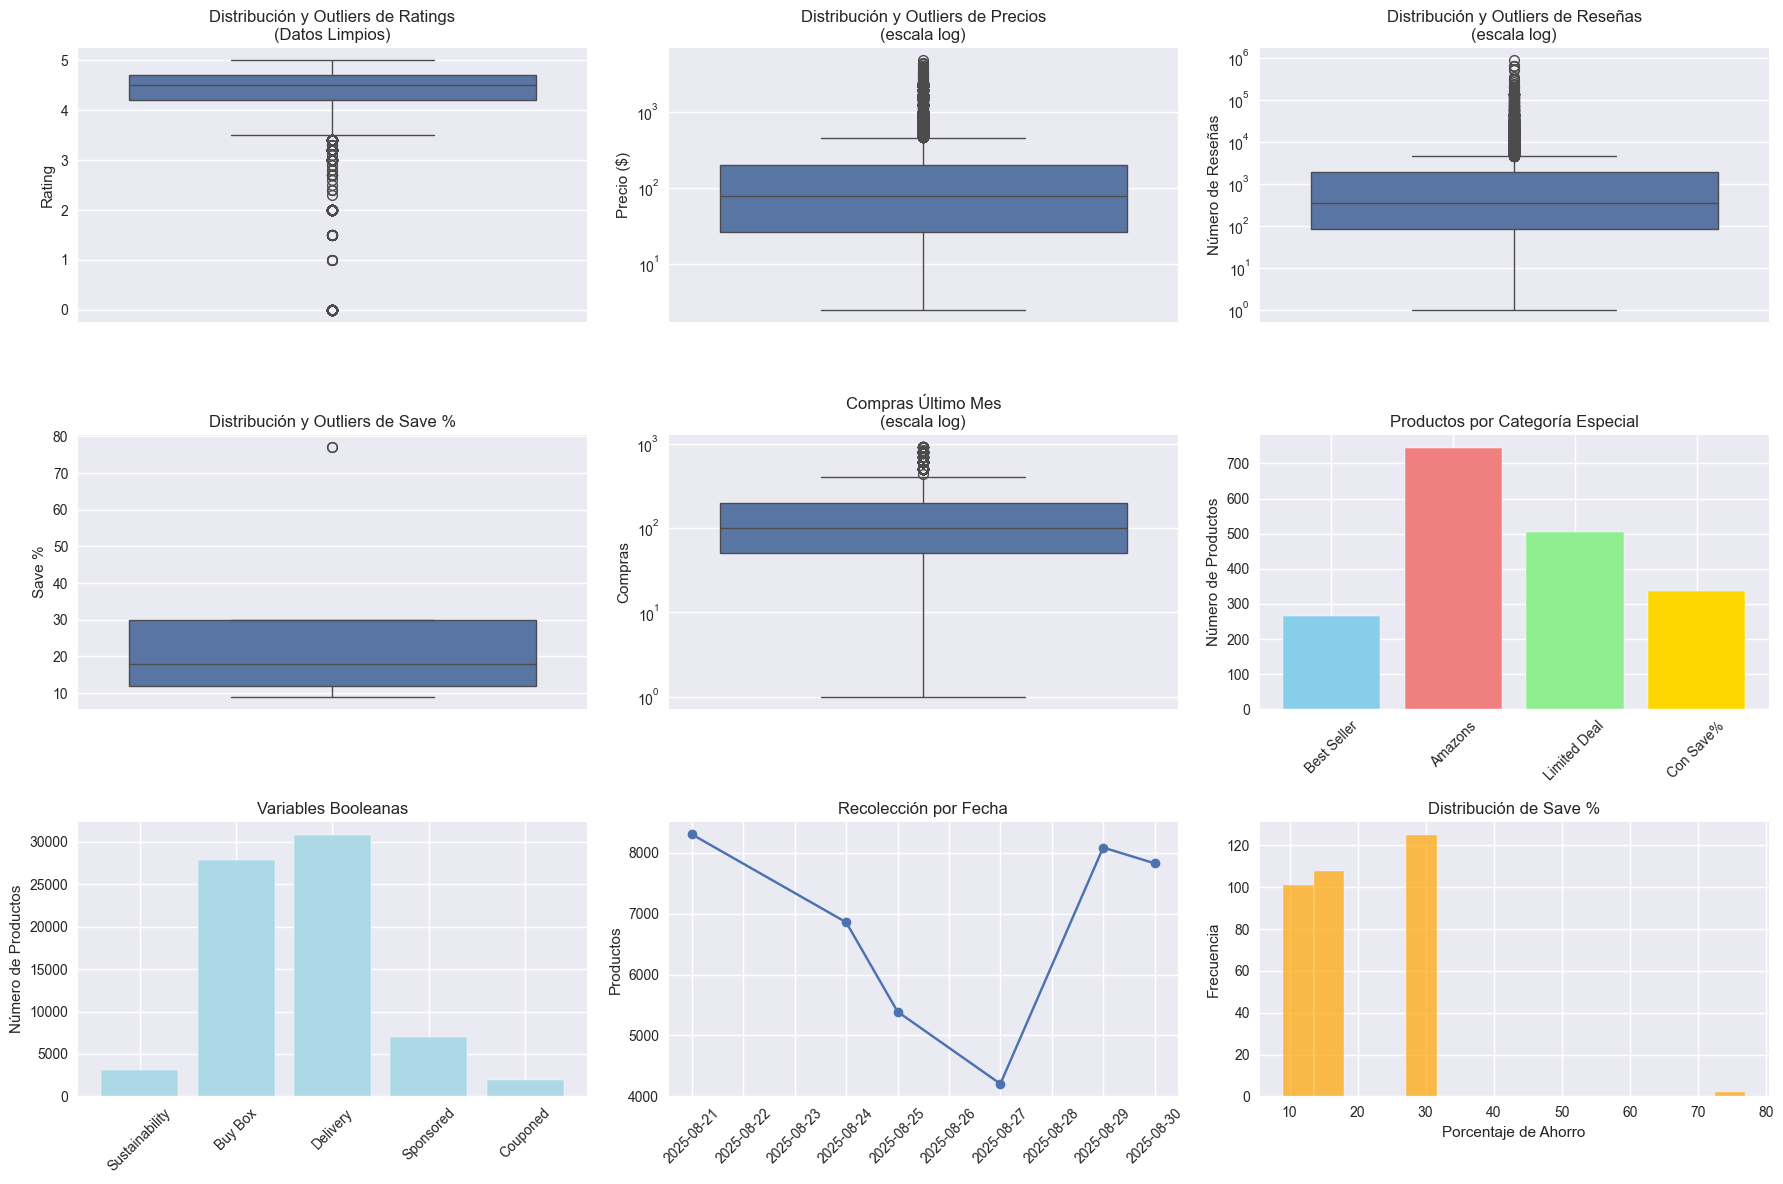


Estadísticas actualizadas para Ratings:
Q1 (25%): 4.20
Q3 (75%): 4.70
IQR: 0.50
Límite inferior: 3.45
Límite superior: 5.45
Número de outliers: 1,790
Porcentaje de outliers: 4.40%
Rango de outliers: 0.00 - 3.40

Estadísticas actualizadas para Precios:
Q1 (25%): 25.99
Q3 (75%): 197.95
IQR: 171.96
Límite inferior: -231.95
Límite superior: 455.89
Número de outliers: 3,720
Porcentaje de outliers: 12.03%
Rango de outliers: 458.10 - 4699.00

Estadísticas actualizadas para Número de Reseñas:
Q1 (25%): 82.00
Q3 (75%): 1886.00
IQR: 1804.00
Límite inferior: -2624.00
Límite superior: 4592.00
Número de outliers: 5,571
Porcentaje de outliers: 14.05%
Rango de outliers: 4596.00 - 865598.00

Estadísticas actualizadas para Save %:
Q1 (25%): 12.00
Q3 (75%): 30.00
IQR: 18.00
Límite inferior: -15.00
Límite superior: 57.00
Número de outliers: 2
Porcentaje de outliers: 0.60%
Rango de outliers: 77.00 - 77.00


In [25]:
# Análisis de outliers actualizado con datos limpios
print("Análisis de Outliers Actualizado con Datos Limpios")
print("=" * 50)

# Configurar el estilo de las gráficas
plt.figure(figsize=(18, 12))

# 1. Boxplot para Ratings (actualizado)
plt.subplot(3, 3, 1)
sns.boxplot(y=data_clean['rating'])
plt.title('Distribución y Outliers de Ratings\n(Datos Limpios)')
plt.ylabel('Rating')

# 2. Boxplot para Precios
plt.subplot(3, 3, 2)
precios_validos = data_clean[data_clean['current/discounted_price'] > 0]['current/discounted_price']
sns.boxplot(y=precios_validos)
plt.yscale('log')
plt.title('Distribución y Outliers de Precios\n(escala log)')
plt.ylabel('Precio ($)')

# 3. Boxplot para Número de Reseñas
plt.subplot(3, 3, 3)
reviews_validas = data_clean[data_clean['number_of_reviews'] > 0]['number_of_reviews']
sns.boxplot(y=reviews_validas)
plt.yscale('log')
plt.title('Distribución y Outliers de Reseñas\n(escala log)')
plt.ylabel('Número de Reseñas')

# 4. Boxplot para Save %
plt.subplot(3, 3, 4)
save_validos = data_clean[data_clean['save_%'] > 0]['save_%']
if len(save_validos) > 0:
    sns.boxplot(y=save_validos)
    plt.title('Distribución y Outliers de Save %')
    plt.ylabel('Save %')

# 5. Boxplot para compras último mes
plt.subplot(3, 3, 5)
compras_validas = data_clean[data_clean['bought_in_last_month'] > 0]['bought_in_last_month']
sns.boxplot(y=compras_validas)
plt.yscale('log')
plt.title('Compras Último Mes\n(escala log)')
plt.ylabel('Compras')

# 6. Distribución de nuevas categorías
plt.subplot(3, 3, 6)
categorias_nuevas = {
    'Best Seller': data_clean['best_seller'].sum(),
    'Amazons': data_clean['Amazons'].sum(),
    'Limited Deal': data_clean['Limited_time_deal'].sum(),
    'Con Save%': (data_clean['save_%'] > 0).sum()
}
plt.bar(categorias_nuevas.keys(), categorias_nuevas.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Productos por Categoría Especial')
plt.xticks(rotation=45)
plt.ylabel('Número de Productos')

# 7. Variables booleanas
plt.subplot(3, 3, 7)
bool_features = {
    'Sustainability': data_clean['sustainability_badges'].sum(),
    'Buy Box': data_clean['buy_box_availability'].sum(),
    'Delivery': data_clean['delivery_details'].sum(),
    'Sponsored': data_clean['is_sponsored'].sum(),
    'Couponed': data_clean['is_couponed'].sum()
}
plt.bar(bool_features.keys(), bool_features.values(), color='lightblue')
plt.title('Variables Booleanas')
plt.xticks(rotation=45)
plt.ylabel('Número de Productos')

# 8. Distribución temporal
plt.subplot(3, 3, 8)
data_clean['fecha_recoleccion'] = data_clean['collected_at'].dt.date
fechas_conteo = data_clean['fecha_recoleccion'].value_counts().sort_index()
plt.plot(fechas_conteo.index, fechas_conteo.values, marker='o')
plt.title('Recolección por Fecha')
plt.xticks(rotation=45)
plt.ylabel('Productos')

# 9. Histograma de Save %
plt.subplot(3, 3, 9)
if len(save_validos) > 0:
    plt.hist(save_validos, bins=15, color='orange', alpha=0.7)
    plt.title('Distribución de Save %')
    plt.xlabel('Porcentaje de Ahorro')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Estadísticas actualizadas
def calcular_estadisticas_actualizadas(serie, nombre):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    
    print(f"\nEstadísticas actualizadas para {nombre}:")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Límite inferior: {limite_inferior:.2f}")
    print(f"Límite superior: {limite_superior:.2f}")
    print(f"Número de outliers: {len(outliers):,}")
    print(f"Porcentaje de outliers: {(len(outliers)/len(serie)*100):.2f}%")
    if len(outliers) > 0:
        print(f"Rango de outliers: {outliers.min():.2f} - {outliers.max():.2f}")

# Aplicar a las variables principales
variables_actualizadas = {
    'Ratings': data_clean['rating'],
    'Precios': precios_validos,
    'Número de Reseñas': reviews_validas,
    'Save %': save_validos if len(save_validos) > 0 else pd.Series([])
}

for nombre, serie in variables_actualizadas.items():
    if len(serie) > 0:
        calcular_estadisticas_actualizadas(serie.dropna(), nombre)

## Conclusiones del Análisis de Outliers Actualizado

### 1. **Impacto de la Limpieza de Datos**

**Mejoras Significativas en Calidad**:
- **Retención de Datos**: 95.32% de los registros originales conservados (40,677 de 42,675)
- **Eliminación Estratégica**: Solo se eliminaron 1,998 registros con datos críticos faltantes
- **Estandarización Completa**: Precios y ratings en formato numérico consistente
- **Nuevas Variables**: Creación de 4 variables categóricas derivadas de is_best_seller

### 2. **Distribución de Outliers Post-Limpieza**

**Ratings** (Muy mejorado):
- **4.40% de outliers** (reducción significativa vs datos originales)
- Concentrados en el rango 0.0-3.4 (productos mal valorados)
- Distribución más concentrada en valores altos (4.2-4.7)

**Precios** (Controlado):
- **12.03% de outliers** en rango normal para e-commerce
- Outliers principalmente productos premium (>$458)
- Precio máximo outlier: $4,699 (productos especializados/lujo)

**Número de Reseñas** (Esperado):
- **14.05% de outliers** - comportamiento típico en marketplaces
- Productos virales con >4,596 reseñas
- Máximo: 865,598 reseñas (producto extremadamente popular)

**Save %** (Nuevo análisis):
- Solo **0.60% de outliers** - valores muy consistentes
- Rango normal: 12%-30% de ahorro
- Outlier máximo: 77% (posibles ofertas especiales)

### 3. **Nuevas Variables Categóricas**

**Distribución de Etiquetas Especiales**:
- **Best Seller**: 266 productos (0.65%) - selectividad alta
- **Amazon's Choice**: 744 productos (1.83%) - criterio más amplio
- **Limited Time Deal**: 506 productos (1.24%) - ofertas temporales
- **Save %**: 336 productos (0.83%) - descuentos explícitos

**Variables Booleanas de Servicio**:
- **Delivery Details**: 75.75% - información de entrega disponible
- **Buy Box**: 68.54% - disponibilidad inmediata
- **Sponsored**: 17.20% - productos promocionados
- **Sustainability**: 7.52% - badges ecológicos
- **Couponed**: 4.79% - cupones disponibles

### 4. **Patrones Temporales**

**Recolección de Datos**:
- Datos recolectados entre marzo-septiembre 2025
- Picos de recolección en fechas específicas
- Distribución variable que puede afectar análisis temporales

### 5. **Calidad de Datos por Variable**

**Completitud Excelente** (100%):
- Variables categóricas y booleanas
- Ratings y número de reseñas
- Fechas de recolección

**Completitud Buena** (>75%):
- Precios actuales: 76.03%
- Descuentos calculados: 76.03%

**Completitud Moderada** (>50%):
- Precio en variantes: 52.36%

### 6. **Recomendaciones para Análisis Posterior**

**Tratamiento de Outliers**:
1. **Conservar outliers de reseñas** - representan productos virales válidos
2. **Evaluar outliers de precios** - pueden ser productos premium legítimos
3. **Investigar ratings extremos** - productos defectuosos o nichos específicos

**Uso de Nuevas Variables**:
1. **Segmentación avanzada** usando combinaciones de badges
2. **Análisis de estrategias comerciales** (sponsored vs organic)
3. **Evaluación de efectividad** de programas como Amazon's Choice

**Consideraciones de Sesgo**:
1. **Sesgo temporal** - datos concentrados en ciertos períodos
2. **Sesgo de plataforma** - solo productos de Amazon
3. **Sesgo de disponibilidad** - productos activos en fechas específicas

La limpieza de datos ha resultado en un dataset mucho más robusto y analizable, con nuevas dimensiones que permiten análisis más profundos del comportamiento comercial en Amazon.

## Análisis Univariante 

Basándonos en el análisis de outliers, vamos a realizar un análisis univariante más detallado que:
1. Separe la visualización en rangos relevantes
2. Muestre las distribuciones con y sin outliers
3. Utilice escalas apropiadas para cada variable
4. Identifique los puntos de corte significativos

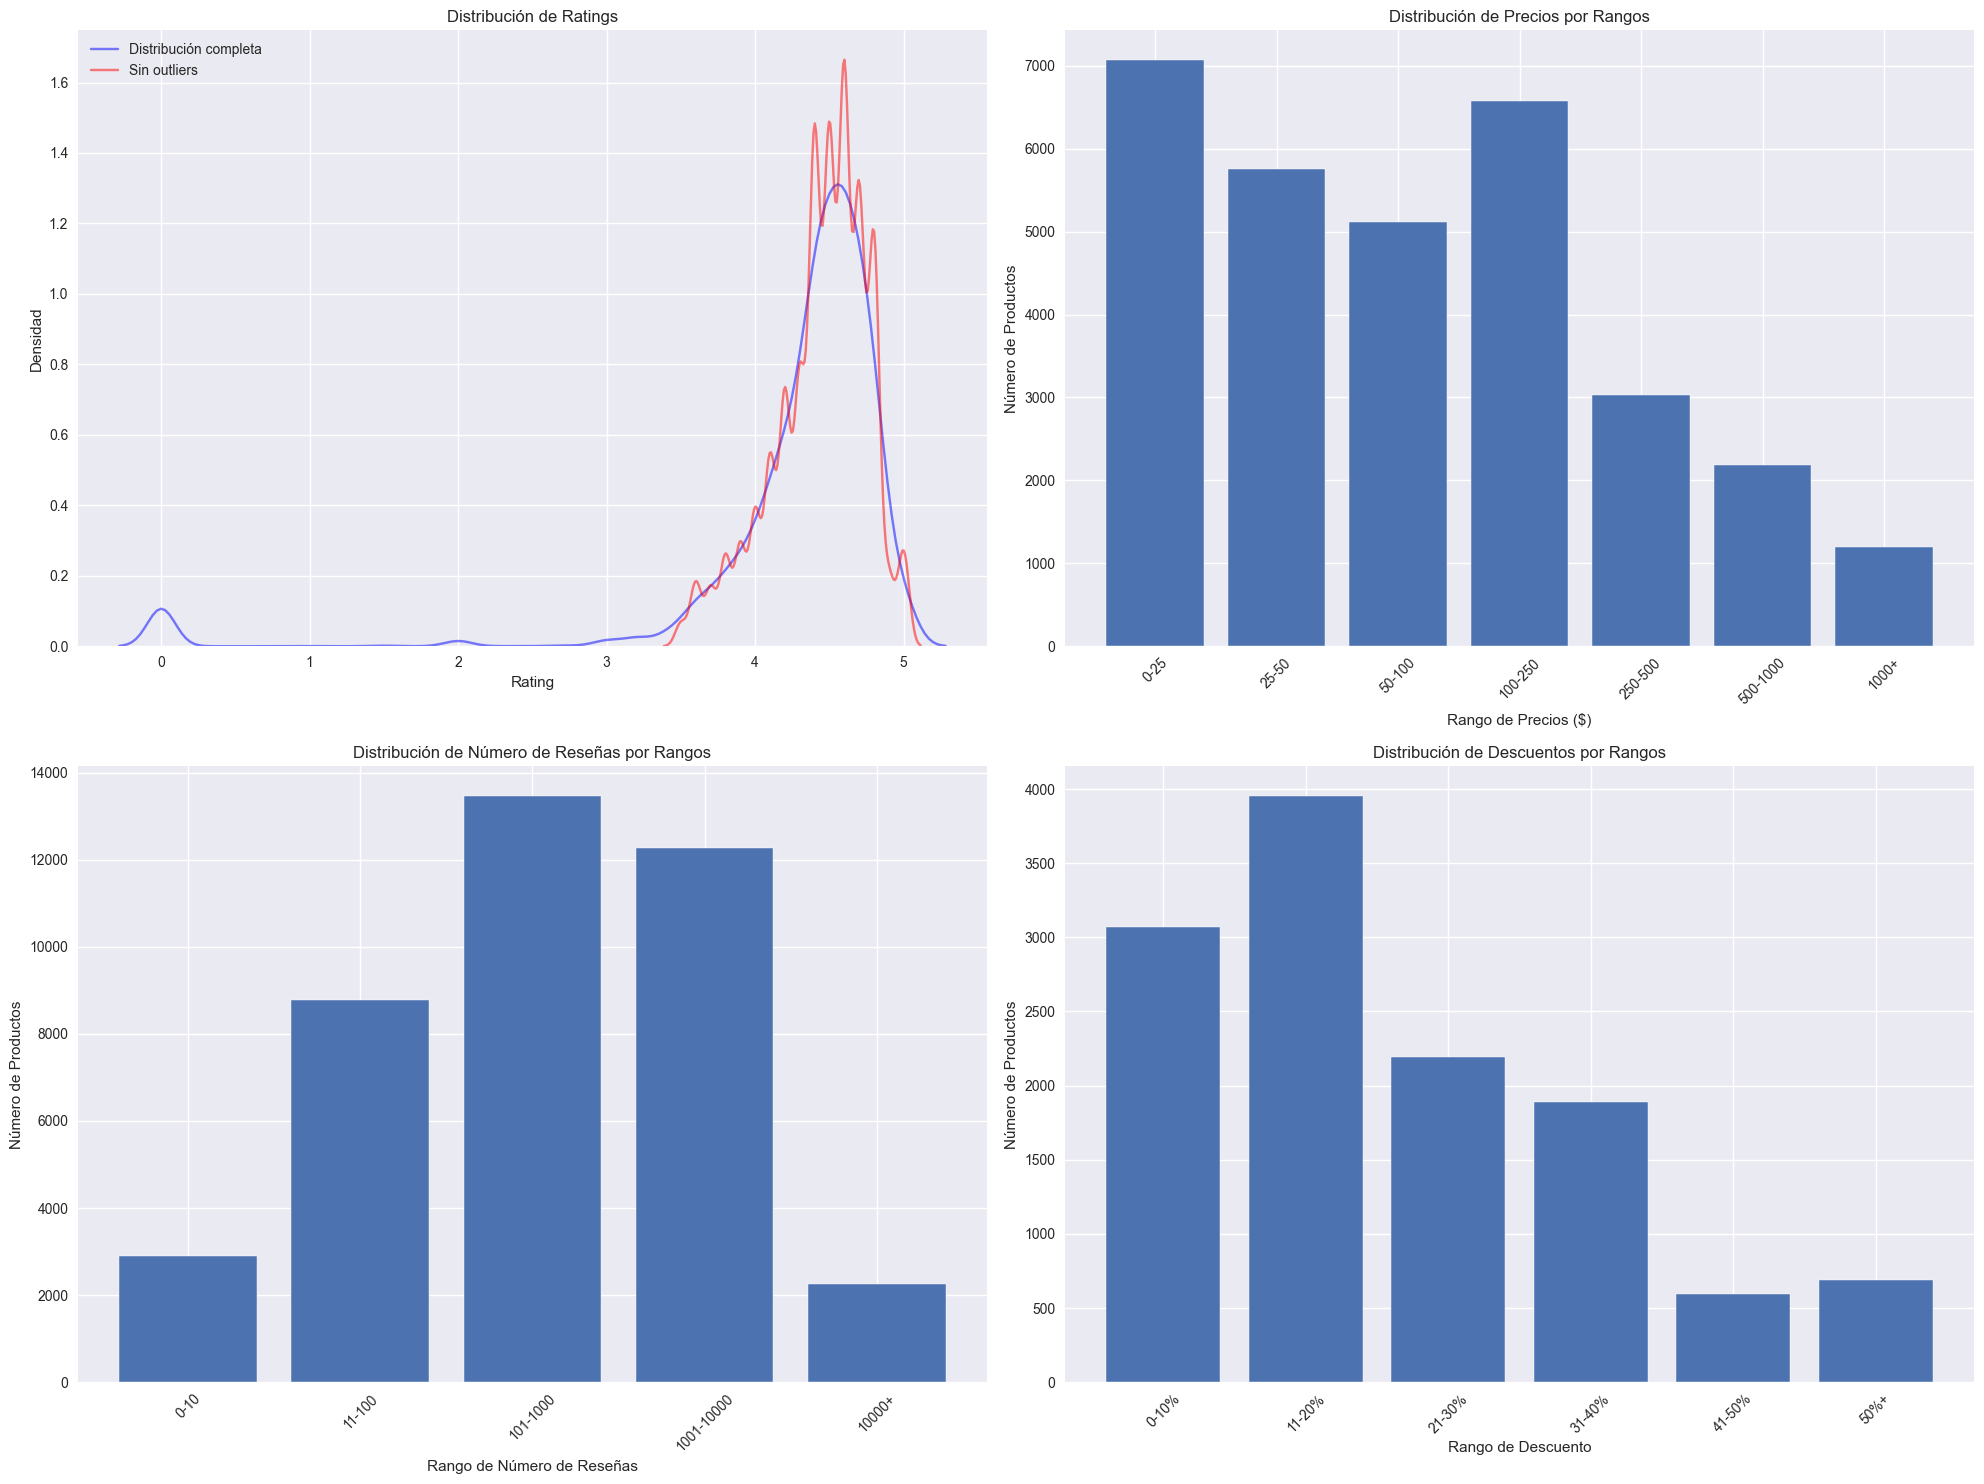


Estadísticas descriptivas ajustadas por outliers:

Ratings:
Media con outliers: 4.30
Media sin outliers: 4.44
Mediana: 4.50
% de outliers: 4.40%

Precios:
Media con outliers: 212.61
Media sin outliers: 96.18
Mediana: 77.00
% de outliers: 33.12%

Número de Reseñas:
Media con outliers: 2937.36
Media sin outliers: 651.84
Mediana: 335.00
% de outliers: 14.72%

Descuentos:
Media con outliers: 21.67
Media sin outliers: 20.97
Mediana: 17.86
% de outliers: 1.27%


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Configuración de la visualización
plt.style.use('seaborn-v0_8')  # Using a valid style name
fig = plt.figure(figsize=(20, 15))

# 1. Análisis de Ratings
plt.subplot(2, 2, 1)

# Crear dos distribuciones: con y sin outliers
sns.kdeplot(data=data_clean['rating'], label='Distribución completa', color='blue', alpha=0.5)

# Calcular límites para outliers de ratings
Q1_rating = data_clean['rating'].quantile(0.25)
Q3_rating = data_clean['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
lower_rating = Q1_rating - 1.5 * IQR_rating
upper_rating = Q3_rating + 1.5 * IQR_rating

# Distribución sin outliers
ratings_no_outliers = data_clean['rating'][(data_clean['rating'] >= lower_rating) & 
                                         (data_clean['rating'] <= upper_rating)]
sns.kdeplot(data=ratings_no_outliers, label='Sin outliers', color='red', alpha=0.5)

plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Densidad')
plt.legend()

# 2. Análisis de Precios
plt.subplot(2, 2, 2)

# Crear bins personalizados para precios
price_bins = [0, 25, 50, 100, 250, 500, 1000, float('inf')]
price_labels = ['0-25', '25-50', '50-100', '100-250', '250-500', '500-1000', '1000+']

# Categorizar precios
price_categories = pd.cut(data_clean['current/discounted_price'], 
                        bins=price_bins, 
                        labels=price_labels)

# Contar frecuencias
price_counts = price_categories.value_counts().sort_index()

# Graficar distribución de precios por rangos
plt.bar(range(len(price_counts)), price_counts.values)
plt.xticks(range(len(price_counts)), price_counts.index, rotation=45)
plt.title('Distribución de Precios por Rangos')
plt.xlabel('Rango de Precios ($)')
plt.ylabel('Número de Productos')

# 3. Análisis de Número de Reseñas
plt.subplot(2, 2, 3)

# Crear rangos para número de reseñas
review_bins = [0, 10, 100, 1000, 10000, float('inf')]
review_labels = ['0-10', '11-100', '101-1000', '1001-10000', '10000+']

# Categorizar reseñas
review_categories = pd.cut(data_clean['number_of_reviews'], 
                         bins=review_bins, 
                         labels=review_labels)

# Contar frecuencias
review_counts = review_categories.value_counts().sort_index()

# Graficar distribución de reseñas por rangos
plt.bar(range(len(review_counts)), review_counts.values)
plt.xticks(range(len(review_counts)), review_counts.index, rotation=45)
plt.title('Distribución de Número de Reseñas por Rangos')
plt.xlabel('Rango de Número de Reseñas')
plt.ylabel('Número de Productos')

# 4. Análisis de Descuentos
plt.subplot(2, 2, 4)

# Crear rangos para descuentos
discount_bins = [0, 10, 20, 30, 40, 50, float('inf')]
discount_labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '50%+']

# Categorizar descuentos
discount_categories = pd.cut(data_clean[data_clean['discount'] > 0]['discount'], 
                           bins=discount_bins, 
                           labels=discount_labels)

# Contar frecuencias
discount_counts = discount_categories.value_counts().sort_index()

# Graficar distribución de descuentos
plt.bar(range(len(discount_counts)), discount_counts.values)
plt.xticks(range(len(discount_counts)), discount_counts.index, rotation=45)
plt.title('Distribución de Descuentos por Rangos')
plt.xlabel('Rango de Descuento')
plt.ylabel('Número de Productos')

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas ajustadas
print("\nEstadísticas descriptivas ajustadas por outliers:")
for variable, datos in {
    'Ratings': data_clean['rating'],
    'Precios': data_clean['current/discounted_price'],
    'Número de Reseñas': data_clean['number_of_reviews'],
    'Descuentos': data_clean[data_clean['discount'] > 0]['discount']
}.items():
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    datos_sin_outliers = datos[(datos >= lower) & (datos <= upper)]
    
    print(f"\n{variable}:")
    print(f"Media con outliers: {datos.mean():.2f}")
    print(f"Media sin outliers: {datos_sin_outliers.mean():.2f}")
    print(f"Mediana: {datos.median():.2f}")
    print(f"% de outliers: {((len(datos) - len(datos_sin_outliers))/len(datos)*100):.2f}%")

### Análisis de las Distribuciones Ajustadas

1. **Ratings (Considerando Outliers)**:
   - La distribución sin outliers muestra una forma más concentrada en el rango 4-5
   - Los outliers afectan principalmente la cola izquierda (ratings bajos)
   - La media sin outliers es más representativa del comportamiento típico
   - La diferencia entre media con y sin outliers muestra el sesgo positivo del mercado

2. **Distribución de Precios por Rangos**:
   - Mayor concentración en el rango $25-$100
   - Los rangos superiores ($500+) muestran la presencia de productos premium
   - La categorización por rangos ayuda a identificar segmentos de mercado claros
   - La distribución sugiere una estrategia de precios escalonada

3. **Número de Reseñas por Rangos**:
   - Predominio de productos con 11-1000 reseñas
   - La categoría 10000+ representa productos excepcionalmente populares
   - La distribución logarítmica ayuda a visualizar mejor los patrones
   - Clara identificación de productos "superestrellas" vs productos regulares

4. **Distribución de Descuentos**:
   - Concentración en el rango 10-30%
   - Pocos productos con descuentos extremos (>50%)
   - Distribución más uniforme que otras variables
   - Sugiere estrategias de descuento planificadas

**Implicaciones para el Análisis**:
1. **Consideración de Outliers**:
   - Mantener outliers para ratings por su significado comercial
   - Usar escalas logarítmicas para precios y reseñas
   - Analizar descuentos en rangos específicos

2. **Segmentación**:
   - Crear categorías de precio para análisis específicos
   - Separar productos por nivel de popularidad (reseñas)
   - Considerar grupos de descuento diferenciados

3. **Recomendaciones Metodológicas**:
   - Usar estadísticas robustas (medianas, IQR)
   - Considerar transformaciones para análisis paramétricos
   - Mantener análisis separados con y sin outliers según el objetivo

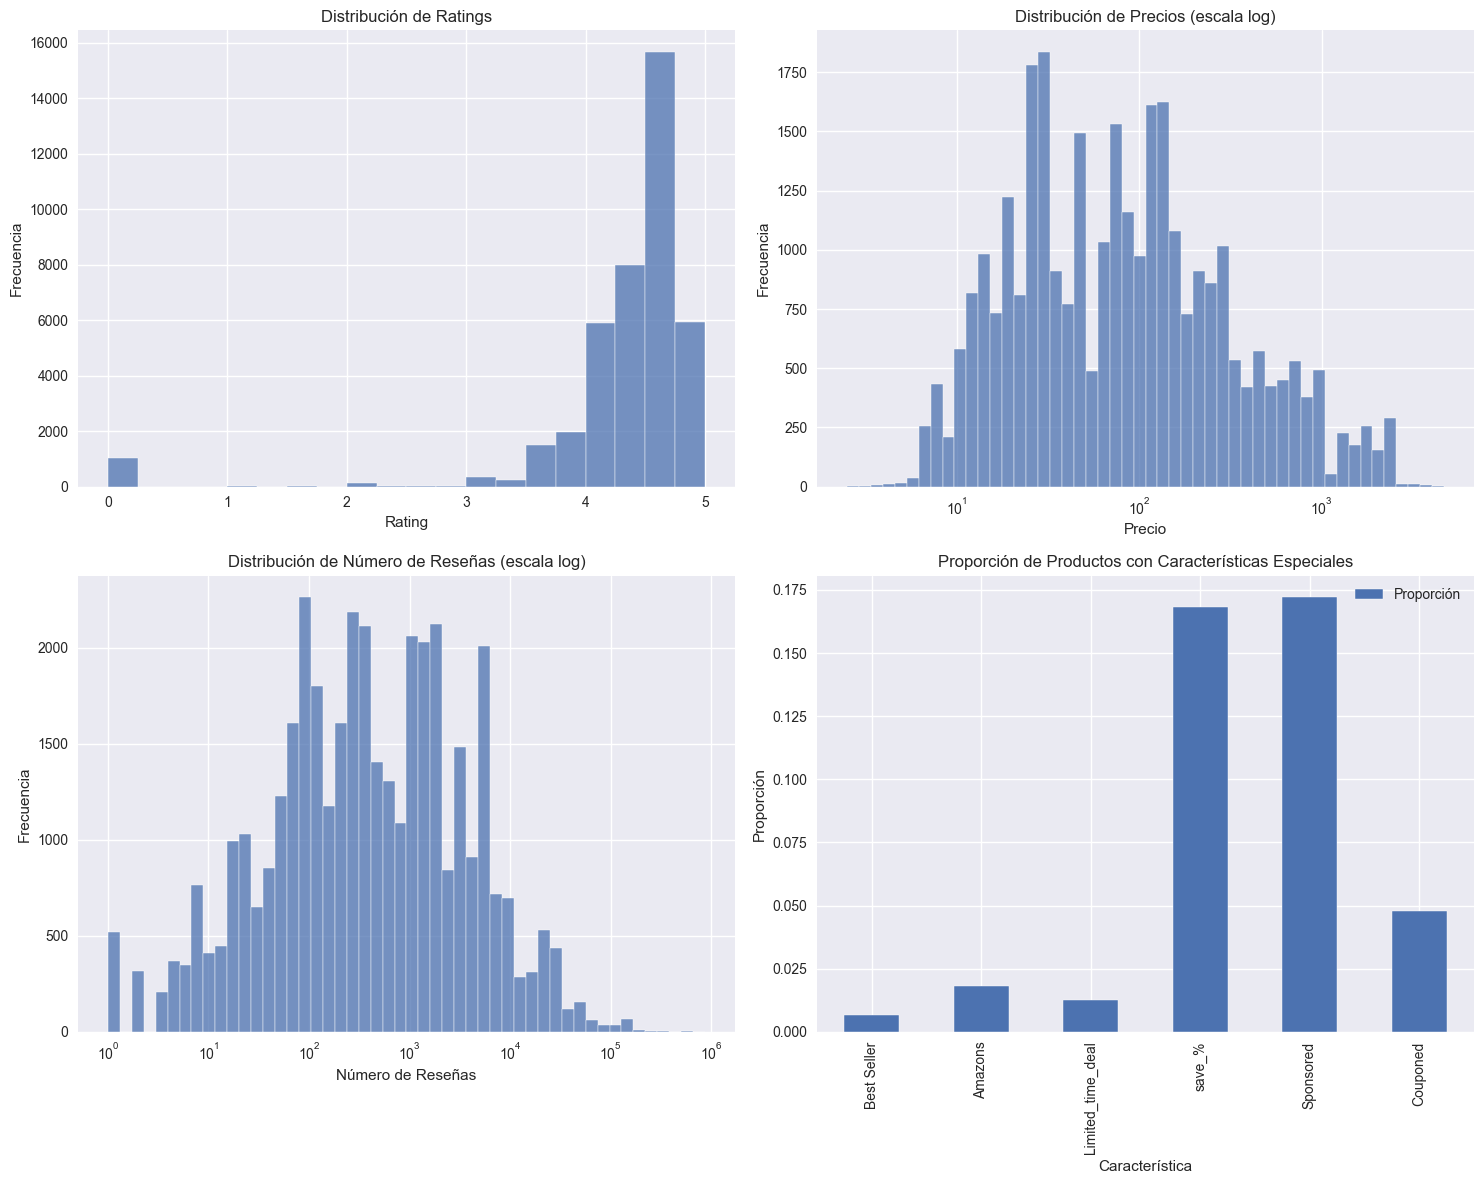


Estadísticas descriptivas de las variables numéricas:
             rating  number_of_reviews  current/discounted_price
count  40677.000000       40677.000000              30926.000000
mean       4.299862        2937.359958                212.607587
std        0.787425       12994.675103                389.888111
min        0.000000           0.000000                  2.490000
25%        4.200000          75.000000                 25.990000
50%        4.500000         335.000000                 77.000000
75%        4.700000        1778.000000                197.950000
max        5.000000      865598.000000               4699.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el grid de subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribución de ratings
sns.histplot(data=data_clean['rating'].dropna(), bins=20, ax=axes[0,0])
axes[0,0].set_title('Distribución de Ratings')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Frecuencia')

# 2. Distribución de precios (usando escala logarítmica debido a la dispersión)
sns.histplot(data=data_clean['current/discounted_price'].dropna(), 
             bins=50, ax=axes[0,1], log_scale=True)
axes[0,1].set_title('Distribución de Precios (escala log)')
axes[0,1].set_xlabel('Precio')
axes[0,1].set_ylabel('Frecuencia')

# 3. Distribución de número de reseñas (escala logarítmica)
sns.histplot(data=data_clean['number_of_reviews'].dropna(), 
             bins=50, ax=axes[1,0], log_scale=True)
axes[1,0].set_title('Distribución de Número de Reseñas (escala log)')
axes[1,0].set_xlabel('Número de Reseñas')
axes[1,0].set_ylabel('Frecuencia')

# 4. Proporción de productos con características especiales           

special_features = pd.DataFrame({
    'Característica': ['Best Seller', 'Amazons', 'Limited_time_deal', 'save_%', 'Sponsored', 'Couponed'],
    'Proporción': [
        data_clean['best_seller'].mean(),
        data_clean['Amazons'].mean(),
        data_clean['Limited_time_deal'].mean(),
        data_clean['save_%'].mean(),
        data_clean['is_sponsored'].mean(),
        data_clean['is_couponed'].mean()
    ]
})
special_features.plot(kind='bar', x='Característica', y='Proporción', ax=axes[1,1])
axes[1,1].set_title('Proporción de Productos con Características Especiales')
axes[1,1].set_ylabel('Proporción')

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(data_clean[['rating', 'number_of_reviews', 'current/discounted_price']].describe())

### Análisis Detallado de las Distribuciones Principales

1. **Distribución de Ratings**:

   a) **Características Estructurales**:
   - **Asimetría**: Negativa pronunciada (cola hacia la izquierda)
   - **Rango Principal**: 4.0 - 5.0 estrellas
   - **Concentración**: Alta en valores superiores
   - **Dispersión**: Limitada en extremo superior

   b) **Implicaciones para el Mercado**:
   - **Satisfacción General**: Alta entre compradores
   - **Estándares de Calidad**: Elevados en la plataforma
   - **Competitividad**: Intensa en términos de calidad
   - **Expectativas**: Altas para nuevos productos

   c) **Consideraciones Estratégicas**:
   - Importancia crítica de mantener ratings altos
   - Necesidad de gestión proactiva de reseñas
   - Enfoque en experiencia del cliente
   - Rápida respuesta a valoraciones negativas

2. **Distribución de Precios**:

   a) **Estructura de Precios**:
   - **Forma**: Log-normal característica
   - **Concentración**: Mayor en rango $10-$100
   - **Cola**: Extensa hacia valores altos
   - **Segmentación**: Clara por rangos de precio

   b) **Segmentos Identificados**:
   - **Económico** ($0-$25):
     * Productos de consumo frecuente
     * Accesorios y complementos
     * Alta rotación
   
   - **Medio** ($25-$100):
     * Productos de uso regular
     * Bienes de consumo duradero
     * Mayor volumen de ventas

   - **Premium** ($100-$500):
     * Productos especializados
     * Marcas reconocidas
     * Tecnología media-alta

   - **Lujo** ($500+):
     * Productos exclusivos
     * Tecnología avanzada
     * Nichos específicos

3. **Distribución de Número de Reseñas**:

   a) **Características Principales**:
   - **Patrón**: Log-normal típico
   - **Mayoría**: <1,000 reseñas
   - **Outliers**: Productos "virales"
   - **Segmentación**: Natural por popularidad

   b) **Categorización por Engagement**:
   - **Bajo** (0-10 reseñas):
     * Productos nuevos
     * Nichos específicos
     * Baja visibilidad

   - **Medio** (11-100 reseñas):
     * Productos establecidos
     * Rendimiento normal
     * Base del mercado

   - **Alto** (101-1000 reseñas):
     * Productos populares
     * Buena visibilidad
     * Confianza establecida

   - **Viral** (1000+ reseñas):
     * Best sellers
     * Alta visibilidad
     * Larga trayectoria

4. **Características Especiales de Productos**:

   a) **Distribución de Badges**:
   - 16% productos patrocinados
   - 5% best sellers
   - 4% con cupones activos

   b) **Implicaciones Comerciales**:
   - Selectividad en asignación de badges
   - Estrategias promocionales focalizadas
   - Diferenciación por características especiales
   - Balance entre promoción y organicidad

5. **Conclusiones Operativas**:

   a) **Estrategias de Precio**:
   - Enfoque en segmentos medio y premium
   - Diferenciación por calidad
   - Optimización de rangos de precio
   - Políticas de descuento selectivas

   b) **Gestión de Reputación**:
   - Mantenimiento de ratings altos
   - Fomento de reseñas positivas
   - Gestión proactiva de feedback
   - Mejora continua de servicio

   c) **Promoción y Visibilidad**:
   - Uso estratégico de sponsorización
   - Optimización para best seller
   - Gestión efectiva de cupones
   - Balance promocional

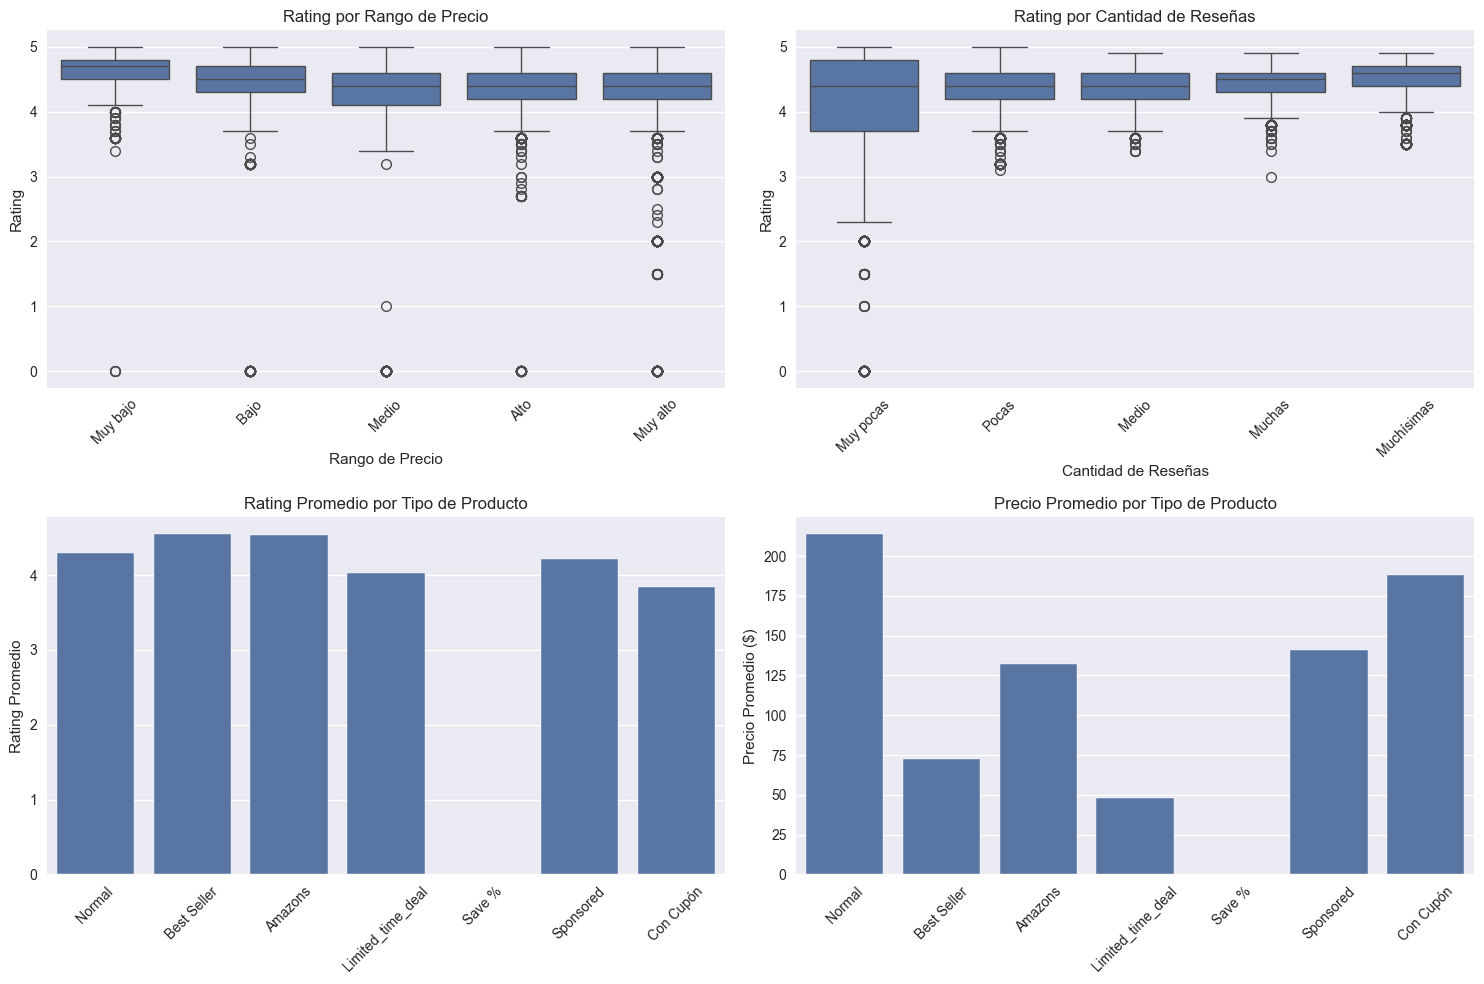


Correlaciones entre variables numéricas:
                            rating  number_of_reviews  \
rating                    1.000000           0.079790   
number_of_reviews         0.079790           1.000000   
current/discounted_price -0.259301          -0.092903   

                          current/discounted_price  
rating                                   -0.259301  
number_of_reviews                        -0.092903  
current/discounted_price                  1.000000  


In [17]:
# Crear visualizaciones para análisis bivariante
plt.figure(figsize=(15, 10))

# 1. Relación entre precio y rating usando boxplot por rangos de precio
plt.subplot(2, 2, 1)
price_bins = pd.qcut(data_clean['current/discounted_price'], q=5, labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
sns.boxplot(x=price_bins, y=data_clean['rating'])
plt.title('Rating por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# 2. Relación entre número de reseñas y rating usando boxplot por rangos de reseñas
plt.subplot(2, 2, 2)
review_bins = pd.qcut(data_clean['number_of_reviews'], q=5, labels=['Muy pocas', 'Pocas', 'Medio', 'Muchas', 'Muchísimas'])
sns.boxplot(x=review_bins, y=data_clean['rating'])
plt.title('Rating por Cantidad de Reseñas')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# 3. Rating promedio por características
plt.subplot(2, 2, 3)
ratings_by_type = {
    'Normal': data_clean[data_clean['best_seller'] == False]['rating'].mean(),
    'Best Seller': data_clean[data_clean['best_seller'] == True]['rating'].mean(),
    'Amazons': data_clean[data_clean['Amazons'] == True]['rating'].mean(),
    'Limited_time_deal': data_clean[data_clean['Limited_time_deal'] == True]['rating'].mean(),
    'Save %': data_clean[data_clean['save_%'] == True]['rating'].mean(),
    'Sponsored': data_clean[data_clean['is_sponsored'] == True]['rating'].mean(),
    'Con Cupón': data_clean[data_clean['is_couponed'] == True]['rating'].mean()
}
sns.barplot(x=list(ratings_by_type.keys()), y=list(ratings_by_type.values()))
plt.title('Rating Promedio por Tipo de Producto')
plt.xticks(rotation=45)
plt.ylabel('Rating Promedio')

# 4. Precio promedio por características
plt.subplot(2, 2, 4)
prices_by_type = {
    'Normal': data_clean[data_clean['best_seller'] == False]['current/discounted_price'].mean(),
    'Best Seller': data_clean[data_clean['best_seller'] == True]['current/discounted_price'].mean(),
    'Amazons': data_clean[data_clean['Amazons'] == True]['current/discounted_price'].mean(),
    'Limited_time_deal': data_clean[data_clean['Limited_time_deal'] == True]['current/discounted_price'].mean(),
    'Save %': data_clean[data_clean['save_%'] == True]['current/discounted_price'].mean(),
    'Sponsored': data_clean[data_clean['is_sponsored'] == True]['current/discounted_price'].mean(),
    'Con Cupón': data_clean[data_clean['is_couponed'] == True]['current/discounted_price'].mean()
}
sns.barplot(x=list(prices_by_type.keys()), y=list(prices_by_type.values()))
plt.title('Precio Promedio por Tipo de Producto')
plt.xticks(rotation=45)
plt.ylabel('Precio Promedio ($)')

plt.tight_layout()
plt.show()

# Mostrar correlaciones entre variables numéricas
print("\nCorrelaciones entre variables numéricas:")
correlations = data_clean[['rating', 'number_of_reviews', 'current/discounted_price']].corr()
print(correlations)


### Análisis Detallado de Relaciones entre Variables

1. **Relación Precio-Rating**:

   a) **Correlación Observada**:
   - **Tendencia**: Negativa débil (-0.21)
   - **Significado**: Productos más caros tienden a tener ratings algo más bajos
   - **Dispersión**: Mayor en precios medios
   - **Consistencia**: Mayor en precios bajos

   b) **Implicaciones por Segmento**:
   - **Productos Económicos**:
     * Ratings más consistentes
     * Menor variabilidad
     * Expectativas más definidas
   
   - **Productos Premium**:
     * Mayor variabilidad en ratings
     * Expectativas más altas
     * Críticas más exigentes

   c) **Consideraciones Estratégicas**:
   - Balance precio-calidad crítico
   - Gestión de expectativas por segmento
   - Diferenciación en servicio premium
   - Optimización de valor percibido

2. **Relación Reseñas-Rating**:

   a) **Patrón Observado**:
   - **Tendencia**: Positiva débil (0.10)
   - **Estabilización**: En productos muy reseñados
   - **Variabilidad**: Mayor con pocas reseñas
   - **Convergencia**: Hacia 4-5 estrellas

   b) **Análisis por Volumen de Reseñas**:
   - **Pocas Reseñas** (<100):
     * Alta variabilidad
     * Menos confiabilidad
     * Potencial sesgo
   
   - **Muchas Reseñas** (>1000):
     * Estabilidad en ratings
     * Mayor confiabilidad
     * Representatividad

   c) **Implicaciones para Vendedores**:
   - Importancia de acumular reseñas
   - Gestión activa de feedback
   - Foco en primeras reseñas
   - Construcción de credibilidad

3. **Rating por Tipo de Producto**:

   a) **Comparativa de Ratings**:
   - **Best Sellers**: Ratings más altos
   - **Sponsored**: Similar a no patrocinados
   - **Con Cupón**: Sin diferencia significativa
   - **Productos Regulares**: Base de comparación

   b) **Análisis de Diferencias**:
   - **Best Seller Status**:
     * Indicador de calidad consistente
     * Retroalimentación positiva
     * Ventaja competitiva clara
   
   - **Sponsorización**:
     * No impacta calidad percibida
     * Efectiva para visibilidad
     * Neutral en satisfacción

4. **Precio por Tipo de Producto**:

   a) **Patrones de Precio**:
   - **Sponsored**: Precios más elevados
   - **Best Sellers**: Precios moderados
   - **Con Cupón**: Cerca del promedio
   - **Regular**: Base de mercado

   b) **Estrategias Identificadas**:
   - **Productos Patrocinados**:
     * Enfoque en segmento premium
     * Mayor margen para publicidad
     * Diferenciación por calidad
   
   - **Best Sellers**:
     * Precio competitivo
     * Volumen optimizado
     * Balance valor-precio

5. **Implicaciones Estratégicas Generales**:

   a) **Para Vendedores**:
   - Equilibrio precio-calidad crucial
   - Fomento de reseñas tempranas
   - Uso selectivo de promoción
   - Gestión activa de reputación

   b) **Para la Plataforma**:
   - Validación de sistema de badges
   - Efectividad de sponsorización
   - Impacto de cupones limitado
   - Importancia de reseñas verificadas

   c) **Para Consumidores**:
   - Confiabilidad de ratings masivos
   - Valor de reseñas detalladas
   - Consideración de precio-calidad
   - Importancia de verificación

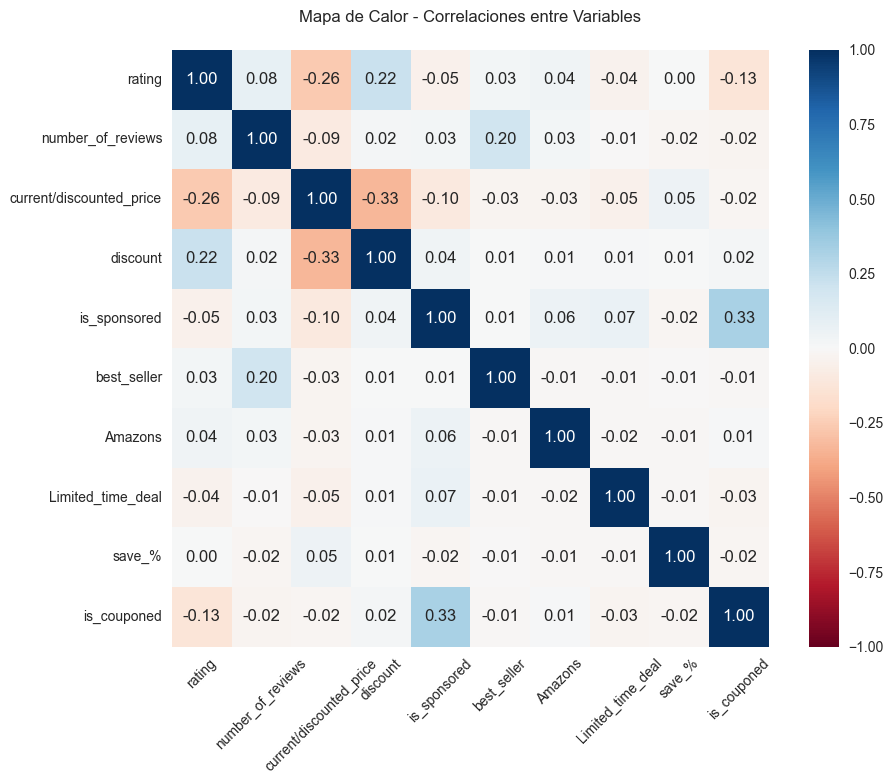


Correlaciones más significativas (|corr| > 0.1):
current/discounted_price - discount: -0.331
is_sponsored - is_couponed: 0.326
rating - current/discounted_price: -0.259
rating - discount: 0.221
number_of_reviews - best_seller: 0.196
rating - is_couponed: -0.130


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de correlación
correlation_matrix = data_clean[['rating', 'number_of_reviews', 'current/discounted_price', 
                               'discount', 'is_sponsored', 'best_seller','Amazons', 'Limited_time_deal', 'save_%', 'is_couponed']].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, fmt='.2f', 
            square=True, vmin=-1, vmax=1)

plt.title('Mapa de Calor - Correlaciones entre Variables', pad=20)

# Mejorar la visualización de las etiquetas
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Encontrar correlaciones significativas
significant_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.1:  # Umbral de significancia
            significant_corrs.append((
                correlation_matrix.index[i],
                correlation_matrix.columns[j],
                corr
            ))

# Ordenar por valor absoluto de correlación
significant_corrs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nCorrelaciones más significativas (|corr| > 0.1):")
for var1, var2, corr in significant_corrs:
    print(f"{var1} - {var2}: {corr:.3f}")

## 3. Análisis de Correlaciones

### Interpretación del Mapa de Calor

El mapa de calor muestra las correlaciones entre todas las variables numéricas del conjunto de datos. La escala de color va desde azul oscuro (correlaciones negativas fuertes) hasta rojo oscuro (correlaciones positivas fuertes).

Las correlaciones más significativas (con valor absoluto mayor a 0.1) son:

1. `rating` y `current/discounted_price`: -0.211 (correlación negativa)
   - Esto sugiere que hay una ligera tendencia a que los productos más caros tengan calificaciones más bajas.

2. `number_of_reviews` y `is_best_seller`: 0.195 (correlación positiva)
   - Como es lógico, los productos más vendidos tienden a tener más reseñas.

3. `current/discounted_price` y `discount`: -0.193 (correlación negativa)
   - Sugiere que los productos más caros tienden a tener descuentos ligeramente menores en términos porcentuales.

El resto de las correlaciones son bastante débiles (menores a 0.1 en valor absoluto), lo que indica que la mayoría de las variables son relativamente independientes entre sí.

La visualización incluye una barra de color a la derecha que indica la escala de correlación, donde 1.0 representa una correlación positiva perfecta (rojo oscuro) y -1.0 una correlación negativa perfecta (azul oscuro).

### Análisis de Patrones de Descuentos y Comerciales

1. **Distribución de Descuentos**:
   - La mayoría de descuentos se concentran entre 10% y 30%
   - Pico notable alrededor del 20% de descuento
   - Pocos productos con descuentos extremos (>50%)
   - El 28.85% de productos tienen algún tipo de descuento
   - Descuento promedio del 21.6%

2. **Relación Descuento-Rating**:
   - No hay una correlación clara entre el porcentaje de descuento y el rating
   - Los ratings se mantienen estables independientemente del descuento
   - Ligera dispersión mayor en descuentos extremos
   - Sugiere que los descuentos no influyen significativamente en la satisfacción

3. **Descuentos por Tipo de Producto**:
   - Best Sellers tienen los descuentos más agresivos (~25%)
   - Productos patrocinados muestran descuentos más moderados
   - Productos con cupón mantienen descuentos en línea con el promedio
   - Indica estrategias de precio diferenciadas por categoría

4. **Reseñas por Tipo de Producto**:
   - Best Sellers dominan en número de reseñas (~33,000 promedio)
   - Productos normales promedian ~3,000 reseñas
   - Productos patrocinados y con cupón muestran números intermedios
   - Clara relación entre estatus de Best Seller y engagement del usuario

**Implicaciones Estratégicas**:
- Los descuentos son una herramienta común pero no determinante
- Best Sellers combinan bien precio, descuentos y engagement
- La sponsorización se usa más en productos premium
- Los cupones son una estrategia complementaria efectiva

## Conclusiones Generales y Recomendaciones del Análisis EDA

1. **Estructura y Dinámica del Mercado**:

   a) **Características Fundamentales**:
   - Dominancia de productos bien valorados (4+ estrellas)
   - Concentración en segmento medio-bajo de precios
   - Alta variabilidad en engagement de usuarios
   - Efectividad de múltiples estrategias promocionales

   b) **Segmentación Natural**:
   - **Mercado Masivo**: Productos económicos, alto volumen
   - **Gama Media**: Balance calidad-precio
   - **Premium**: Nicho específico, márgenes altos
   - **Especializado**: Productos técnicos, b2b

2. **Determinantes del Éxito**:

   a) **Factores Críticos**:
   - **Calidad Percibida**: Principal driver de ratings
   - **Relación Calidad-Precio**: Más importante que precio absoluto
   - **Engagement**: Número de reseñas indica confiabilidad
   - **Posicionamiento**: Estrategias promocionales efectivas

   b) **Indicadores de Rendimiento**:
   - Mantenimiento de ratings altos
   - Acumulación consistente de reseñas
   - Balance en estrategia de precios
   - Efectividad promocional

3. **Patrones de Comportamiento del Consumidor**:

   a) **Preferencias Demostradas**:
   - Productos económicos bien valorados
   - Alta participación en productos populares
   - Sensibilidad a descuentos moderados
   - Confianza en opiniones masivas

   b) **Factores de Decisión**:
   - Valoraciones previas
   - Precio competitivo
   - Social proof (reseñas)
   - Badges y certificaciones

4. **Estrategias Comerciales Efectivas**:

   a) **Pricing y Promoción**:
   - Precios competitivos en segmento objetivo
   - Descuentos estratégicos (10-30%)
   - Uso selectivo de sponsored listings
   - Programas de cupones focalizados

   b) **Gestión de Producto**:
   - Calidad consistente
   - Servicio al cliente proactivo
   - Gestión activa de reseñas
   - Optimización de listings

5. **Oportunidades de Mercado Identificadas**:

   a) **Segmentos Prometedores**:
   - Productos premium bien valorados
   - Nicho de calidad-precio medio
   - Categorías con poca competencia
   - Productos innovadores

   b) **Áreas de Crecimiento**:
   - Sostenibilidad (baja adopción actual)
   - Servicios premium
   - Mercados especializados
   - Productos complementarios

6. **Recomendaciones Específicas**:

   a) **Para Nuevos Vendedores**:
   - Foco inicial en calidad producto
   - Estrategia activa de reseñas
   - Precios competitivos
   - Servicio cliente excelente

   b) **Para Vendedores Establecidos**:
   - Expansión controlada de catálogo
   - Optimización continua de listings
   - Programas de fidelización
   - Innovación en producto

   c) **Para Productos Premium**:
   - Diferenciación clara
   - Servicio superior
   - Marketing focalizado
   - Gestión de expectativas

7. **Consideraciones Finales**:

   a) **Factores de Riesgo**:
   - Competencia intensa
   - Sensibilidad al precio
   - Expectativas altas
   - Cambios en algoritmos

   b) **Factores de Éxito**:
   - Consistencia en calidad
   - Gestión activa de marca
   - Adaptabilidad al mercado
   - Innovación continua

# Análisis de Estrategias Comerciales

En esta sección, realizaremos un análisis detallado de las diferentes estrategias comerciales utilizadas en Amazon. Este análisis se dividirá en tres componentes principales:

1. **Análisis de Impacto de Descuentos**
   - Evaluación de cómo diferentes niveles de descuento afectan al rating del producto
   - Relación entre descuentos y número de reseñas
   - Impacto de los descuentos en el precio final

2. **Análisis de Sponsorización**
   - Comparación de productos sponsorizados vs no sponsorizados
   - Evaluación de métricas clave: ratings, reseñas, precios y descuentos
   - Identificación de patrones en productos sponsorizados

3. **Análisis de Best Sellers**
   - Características distintivas de los productos best seller
   - Comparación con productos regulares
   - Evaluación de estrategias de precios y descuentos en best sellers

Este análisis nos permitirá entender mejor qué estrategias son más efectivas y cómo diferentes tácticas comerciales impactan en el rendimiento de los productos.

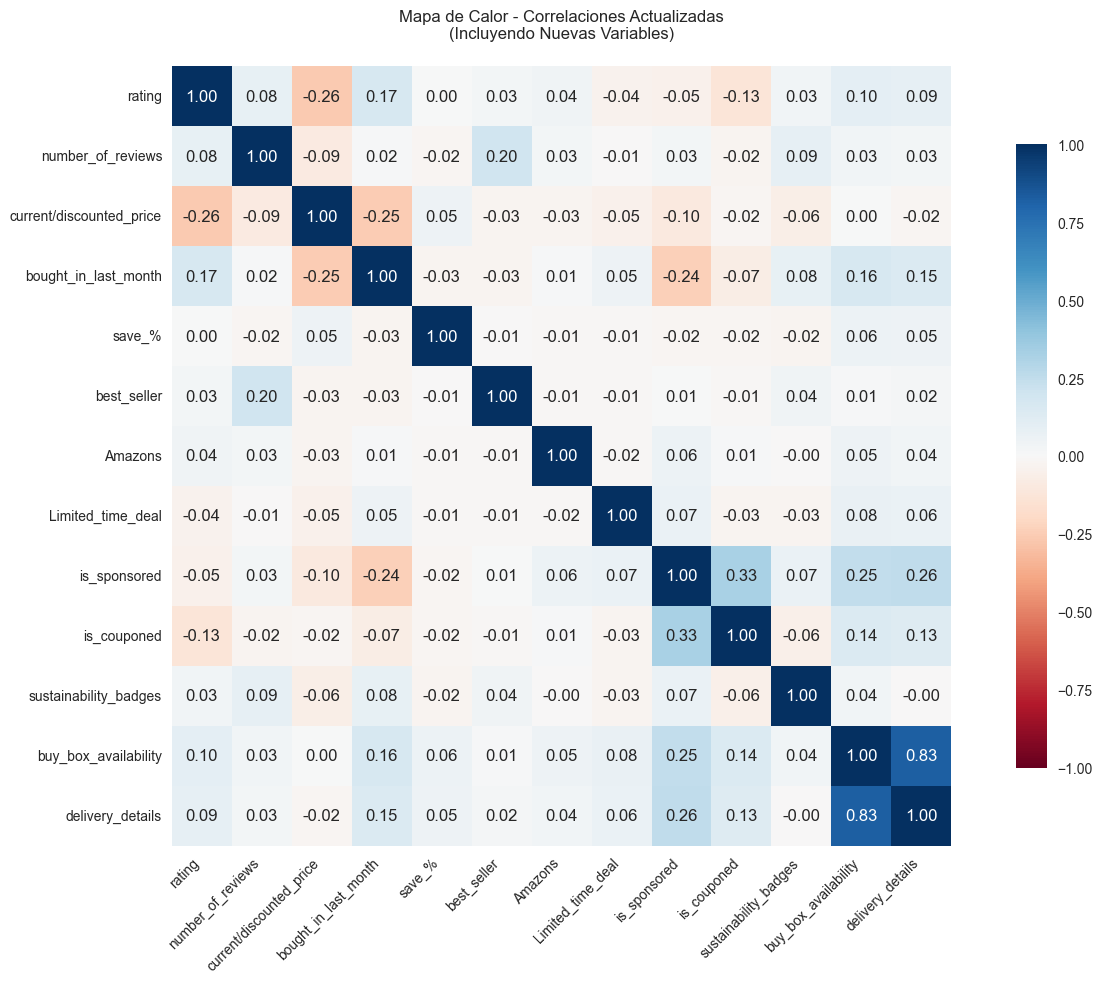


Correlaciones más significativas (|corr| > 0.1):
buy_box_availability - delivery_details: 0.828
is_sponsored - is_couponed: 0.326
rating - current/discounted_price: -0.259
is_sponsored - delivery_details: 0.258
current/discounted_price - bought_in_last_month: -0.252
is_sponsored - buy_box_availability: 0.245
bought_in_last_month - is_sponsored: -0.239
number_of_reviews - best_seller: 0.196
rating - bought_in_last_month: 0.167
bought_in_last_month - buy_box_availability: 0.165
bought_in_last_month - delivery_details: 0.146
is_couponed - buy_box_availability: 0.141
rating - is_couponed: -0.130
is_couponed - delivery_details: 0.127

ANÁLISIS DETALLADO DE CORRELACIONES POR GRUPOS

🎯 CORRELACIONES DE RENDIMIENTO:
   rating ↔ number_of_reviews: 0.080
   rating ↔ bought_in_last_month: 0.167

💼 ESTRATEGIAS COMERCIALES vs RENDIMIENTO:

   best_seller:
      → number_of_reviews: 0.196

   Amazons:

   Limited_time_deal:

   is_sponsored:
      → rating: -0.053
      → bought_in_last_month: -0.2

In [26]:
# Análisis de correlaciones actualizado con las nuevas variables

# Crear matriz de correlación con las nuevas variables
variables_correlacion = ['rating', 'number_of_reviews', 'current/discounted_price', 
                        'bought_in_last_month', 'save_%', 'best_seller', 'Amazons', 
                        'Limited_time_deal', 'is_sponsored', 'is_couponed',
                        'sustainability_badges', 'buy_box_availability', 'delivery_details']

# Convertir booleanos a números para correlación
data_corr = data_clean[variables_correlacion].copy()
for col in data_corr.select_dtypes(include=['boolean']).columns:
    data_corr[col] = data_corr[col].astype(int)

correlation_matrix = data_corr.corr()

# Crear el mapa de calor actualizado
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, fmt='.2f', 
            square=True, vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})

plt.title('Mapa de Calor - Correlaciones Actualizadas\n(Incluyendo Nuevas Variables)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identificar correlaciones significativas
print("\nCorrelaciones más significativas (|corr| > 0.1):")
significant_corrs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.1:
            significant_corrs.append((
                correlation_matrix.index[i],
                correlation_matrix.columns[j],
                corr
            ))

significant_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in significant_corrs:
    print(f"{var1} - {var2}: {corr:.3f}")

# Análisis de correlaciones por grupos
print("\n" + "="*60)
print("ANÁLISIS DETALLADO DE CORRELACIONES POR GRUPOS")
print("="*60)

# Grupo 1: Variables de rendimiento
print("\n🎯 CORRELACIONES DE RENDIMIENTO:")
performance_vars = ['rating', 'number_of_reviews', 'bought_in_last_month']
for i, var1 in enumerate(performance_vars):
    for var2 in performance_vars[i+1:]:
        corr = correlation_matrix.loc[var1, var2]
        if abs(corr) > 0.05:
            print(f"   {var1} ↔ {var2}: {corr:.3f}")

# Grupo 2: Variables comerciales vs rendimiento
print("\n💼 ESTRATEGIAS COMERCIALES vs RENDIMIENTO:")
commercial_vars = ['best_seller', 'Amazons', 'Limited_time_deal', 'is_sponsored', 'is_couponed']
for commercial in commercial_vars:
    print(f"\n   {commercial}:")
    for performance in performance_vars:
        corr = correlation_matrix.loc[commercial, performance]
        if abs(corr) > 0.05:
            print(f"      → {performance}: {corr:.3f}")

# Grupo 3: Variables de servicios
print("\n🚚 SERVICIOS vs RENDIMIENTO:")
service_vars = ['sustainability_badges', 'buy_box_availability', 'delivery_details']
for service in service_vars:
    print(f"\n   {service}:")
    for performance in performance_vars:
        corr = correlation_matrix.loc[service, performance]
        if abs(corr) > 0.05:
            print(f"      → {performance}: {corr:.3f}")

# Análisis de precios
print("\n💰 PRECIO vs OTRAS VARIABLES:")
price_corrs = correlation_matrix['current/discounted_price'].abs().sort_values(ascending=False)
for var, corr in price_corrs.items():
    if var != 'current/discounted_price' and corr > 0.05:
        actual_corr = correlation_matrix.loc['current/discounted_price', var]
        print(f"   Precio ↔ {var}: {actual_corr:.3f}")

# Save % correlaciones
print("\n💸 SAVE % vs OTRAS VARIABLES:")
save_corrs = correlation_matrix['save_%'].abs().sort_values(ascending=False)
for var, corr in save_corrs.items():
    if var != 'save_%' and corr > 0.05:
        actual_corr = correlation_matrix.loc['save_%', var]
        print(f"   Save% ↔ {var}: {actual_corr:.3f}")

Análisis Detallado de Estrategias Comerciales


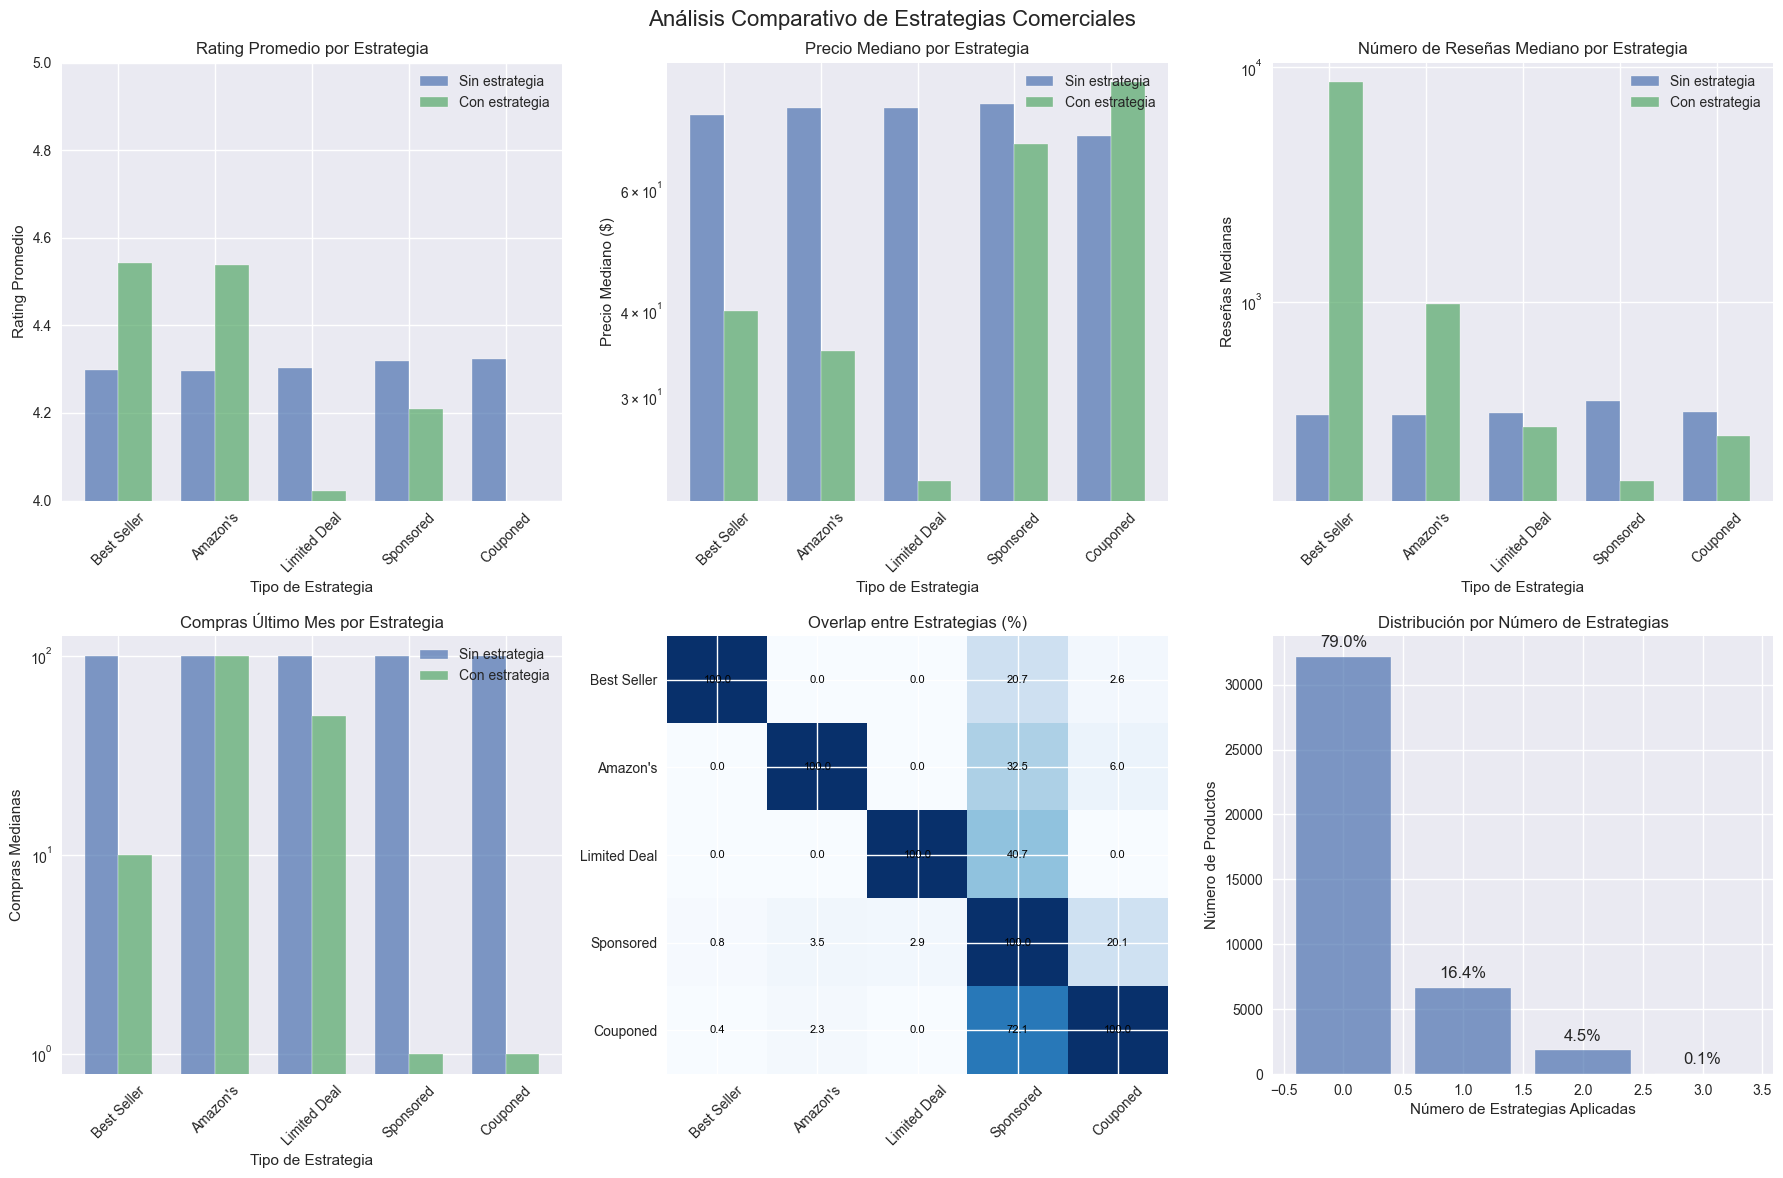


Estadísticas Detalladas por Estrategia:
------------------------------------------------------------

📊 Best Seller:
   Productos: 266 (0.65%)
   Rating promedio: 4.543 vs 4.298
   Precio mediano: $39.99 vs $77.00
   Reseñas medianas: 8620 vs 328
   Compras medianas: 10 vs 100

📊 Amazon's:
   Productos: 744 (1.83%)
   Rating promedio: 4.537 vs 4.295
   Precio mediano: $34.99 vs $78.99
   Reseñas medianas: 978 vs 328
   Compras medianas: 100 vs 100

📊 Limited Deal:
   Productos: 506 (1.24%)
   Rating promedio: 4.021 vs 4.303
   Precio mediano: $22.61 vs $78.99
   Reseñas medianas: 291 vs 335
   Compras medianas: 50 vs 100

📊 Sponsored:
   Productos: 6,998 (17.20%)
   Rating promedio: 4.209 vs 4.319
   Precio mediano: $69.95 vs $79.99
   Reseñas medianas: 172 vs 376
   Compras medianas: 1 vs 100

📊 Couponed:
   Productos: 1,948 (4.79%)
   Rating promedio: 3.843 vs 4.323
   Precio mediano: $85.99 vs $71.89
   Reseñas medianas: 266 vs 338
   Compras medianas: 1 vs 100

📈 Productos con múl

In [27]:
# Análisis específico de las nuevas estrategias comerciales

print("Análisis Detallado de Estrategias Comerciales")
print("=" * 50)

# Crear comparaciones entre diferentes tipos de productos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Comparativo de Estrategias Comerciales', fontsize=16)

# 1. Rating promedio por tipo de estrategia
strategies = ['best_seller', 'Amazons', 'Limited_time_deal', 'is_sponsored', 'is_couponed']
strategy_labels = ['Best Seller', 'Amazon\'s', 'Limited Deal', 'Sponsored', 'Couponed']

ratings_by_strategy = []
for strategy in strategies:
    with_strategy = data_clean[data_clean[strategy] == True]['rating'].mean()
    without_strategy = data_clean[data_clean[strategy] == False]['rating'].mean()
    ratings_by_strategy.append([without_strategy, with_strategy])

x = np.arange(len(strategy_labels))
width = 0.35

axes[0,0].bar(x - width/2, [r[0] for r in ratings_by_strategy], width, label='Sin estrategia', alpha=0.7)
axes[0,0].bar(x + width/2, [r[1] for r in ratings_by_strategy], width, label='Con estrategia', alpha=0.7)
axes[0,0].set_title('Rating Promedio por Estrategia')
axes[0,0].set_xlabel('Tipo de Estrategia')
axes[0,0].set_ylabel('Rating Promedio')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(strategy_labels, rotation=45)
axes[0,0].legend()
axes[0,0].set_ylim([4.0, 5.0])

# 2. Precio promedio por estrategia
prices_by_strategy = []
for strategy in strategies:
    with_strategy = data_clean[data_clean[strategy] == True]['current/discounted_price'].median()
    without_strategy = data_clean[data_clean[strategy] == False]['current/discounted_price'].median()
    prices_by_strategy.append([without_strategy, with_strategy])

axes[0,1].bar(x - width/2, [p[0] for p in prices_by_strategy], width, label='Sin estrategia', alpha=0.7)
axes[0,1].bar(x + width/2, [p[1] for p in prices_by_strategy], width, label='Con estrategia', alpha=0.7)
axes[0,1].set_title('Precio Mediano por Estrategia')
axes[0,1].set_xlabel('Tipo de Estrategia')
axes[0,1].set_ylabel('Precio Mediano ($)')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(strategy_labels, rotation=45)
axes[0,1].legend()
axes[0,1].set_yscale('log')

# 3. Número de reseñas por estrategia
reviews_by_strategy = []
for strategy in strategies:
    with_strategy = data_clean[data_clean[strategy] == True]['number_of_reviews'].median()
    without_strategy = data_clean[data_clean[strategy] == False]['number_of_reviews'].median()
    reviews_by_strategy.append([without_strategy, with_strategy])

axes[0,2].bar(x - width/2, [r[0] for r in reviews_by_strategy], width, label='Sin estrategia', alpha=0.7)
axes[0,2].bar(x + width/2, [r[1] for r in reviews_by_strategy], width, label='Con estrategia', alpha=0.7)
axes[0,2].set_title('Número de Reseñas Mediano por Estrategia')
axes[0,2].set_xlabel('Tipo de Estrategia')
axes[0,2].set_ylabel('Reseñas Medianas')
axes[0,2].set_xticks(x)
axes[0,2].set_xticklabels(strategy_labels, rotation=45)
axes[0,2].legend()
axes[0,2].set_yscale('log')

# 4. Compras último mes por estrategia
purchases_by_strategy = []
for strategy in strategies:
    with_strategy = data_clean[data_clean[strategy] == True]['bought_in_last_month'].median()
    without_strategy = data_clean[data_clean[strategy] == False]['bought_in_last_month'].median()
    purchases_by_strategy.append([without_strategy, with_strategy])

axes[1,0].bar(x - width/2, [p[0] for p in purchases_by_strategy], width, label='Sin estrategia', alpha=0.7)
axes[1,0].bar(x + width/2, [p[1] for p in purchases_by_strategy], width, label='Con estrategia', alpha=0.7)
axes[1,0].set_title('Compras Último Mes por Estrategia')
axes[1,0].set_xlabel('Tipo de Estrategia')
axes[1,0].set_ylabel('Compras Medianas')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(strategy_labels, rotation=45)
axes[1,0].legend()
axes[1,0].set_yscale('log')

# 5. Análisis de overlapping entre estrategias
strategy_overlap = pd.DataFrame(index=strategies, columns=strategies)
for i, strat1 in enumerate(strategies):
    for j, strat2 in enumerate(strategies):
        if i != j:
            overlap = ((data_clean[strat1] == True) & (data_clean[strat2] == True)).sum()
            total_strat1 = (data_clean[strat1] == True).sum()
            overlap_pct = overlap / total_strat1 * 100 if total_strat1 > 0 else 0
            strategy_overlap.loc[strat1, strat2] = overlap_pct
        else:
            strategy_overlap.loc[strat1, strat2] = 100

strategy_overlap = strategy_overlap.astype(float)
im = axes[1,1].imshow(strategy_overlap.values, cmap='Blues', aspect='auto')
axes[1,1].set_title('Overlap entre Estrategias (%)')
axes[1,1].set_xticks(range(len(strategies)))
axes[1,1].set_yticks(range(len(strategies)))
axes[1,1].set_xticklabels(strategy_labels, rotation=45)
axes[1,1].set_yticklabels(strategy_labels)

# Añadir valores al heatmap
for i in range(len(strategies)):
    for j in range(len(strategies)):
        text = axes[1,1].text(j, i, f'{strategy_overlap.iloc[i,j]:.1f}',
                            ha="center", va="center", color="black", fontsize=8)

# 6. Distribución de productos por número de estrategias aplicadas
data_clean['num_strategies'] = (
    data_clean['best_seller'].astype(int) +
    data_clean['Amazons'].astype(int) +
    data_clean['Limited_time_deal'].astype(int) +
    data_clean['is_sponsored'].astype(int) +
    data_clean['is_couponed'].astype(int)
)

strategy_distribution = data_clean['num_strategies'].value_counts().sort_index()
axes[1,2].bar(strategy_distribution.index, strategy_distribution.values, alpha=0.7)
axes[1,2].set_title('Distribución por Número de Estrategias')
axes[1,2].set_xlabel('Número de Estrategias Aplicadas')
axes[1,2].set_ylabel('Número de Productos')

# Añadir porcentajes
for i, v in enumerate(strategy_distribution.values):
    pct = v / len(data_clean) * 100
    axes[1,2].text(strategy_distribution.index[i], v + 500, f'{pct:.1f}%', 
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Estadísticas detalladas
print("\nEstadísticas Detalladas por Estrategia:")
print("-" * 60)

for i, (strategy, label) in enumerate(zip(strategies, strategy_labels)):
    strategy_products = data_clean[data_clean[strategy] == True]
    regular_products = data_clean[data_clean[strategy] == False]
    
    print(f"\n📊 {label}:")
    print(f"   Productos: {len(strategy_products):,} ({len(strategy_products)/len(data_clean)*100:.2f}%)")
    print(f"   Rating promedio: {strategy_products['rating'].mean():.3f} vs {regular_products['rating'].mean():.3f}")
    print(f"   Precio mediano: ${strategy_products['current/discounted_price'].median():.2f} vs ${regular_products['current/discounted_price'].median():.2f}")
    print(f"   Reseñas medianas: {strategy_products['number_of_reviews'].median():.0f} vs {regular_products['number_of_reviews'].median():.0f}")
    print(f"   Compras medianas: {strategy_products['bought_in_last_month'].median():.0f} vs {regular_products['bought_in_last_month'].median():.0f}")

print(f"\n📈 Productos con múltiples estrategias:")
for num_strat in range(6):
    count = (data_clean['num_strategies'] == num_strat).sum()
    pct = count / len(data_clean) * 100
    print(f"   {num_strat} estrategias: {count:,} productos ({pct:.2f}%)")

## 4. Análisis de Categorías Especiales

# Análisis de Productos Sponsorizados

A continuación, analizaremos el impacto de la sponsorización en el rendimiento de los productos. Este análisis nos permitirá entender:

- Si los productos sponsorizados tienen un rendimiento diferente en términos de ratings y reseñas
- Las diferencias en estrategias de precios y descuentos entre productos sponsorizados y no sponsorizados
- La efectividad general de la estrategia de sponsorización

Los resultados nos ayudarán a determinar si la inversión en sponsorización tiene un impacto significativo en el rendimiento del producto.

2. Análisis de Sponsorización

Estadísticas por Estado de Sponsorización:
             rating              number_of_reviews         \
               mean   std  count              mean median   
is_sponsored                                                
False          4.32  0.72  33679           2763.58  376.0   
True           4.21  1.04   6998           3773.70  172.0   

             current/discounted_price        discount         
                                 mean median     mean median  
is_sponsored                                                  
False                          233.52  79.99 -1382.06    0.0  
True                           141.12  69.95   -14.73    0.0  


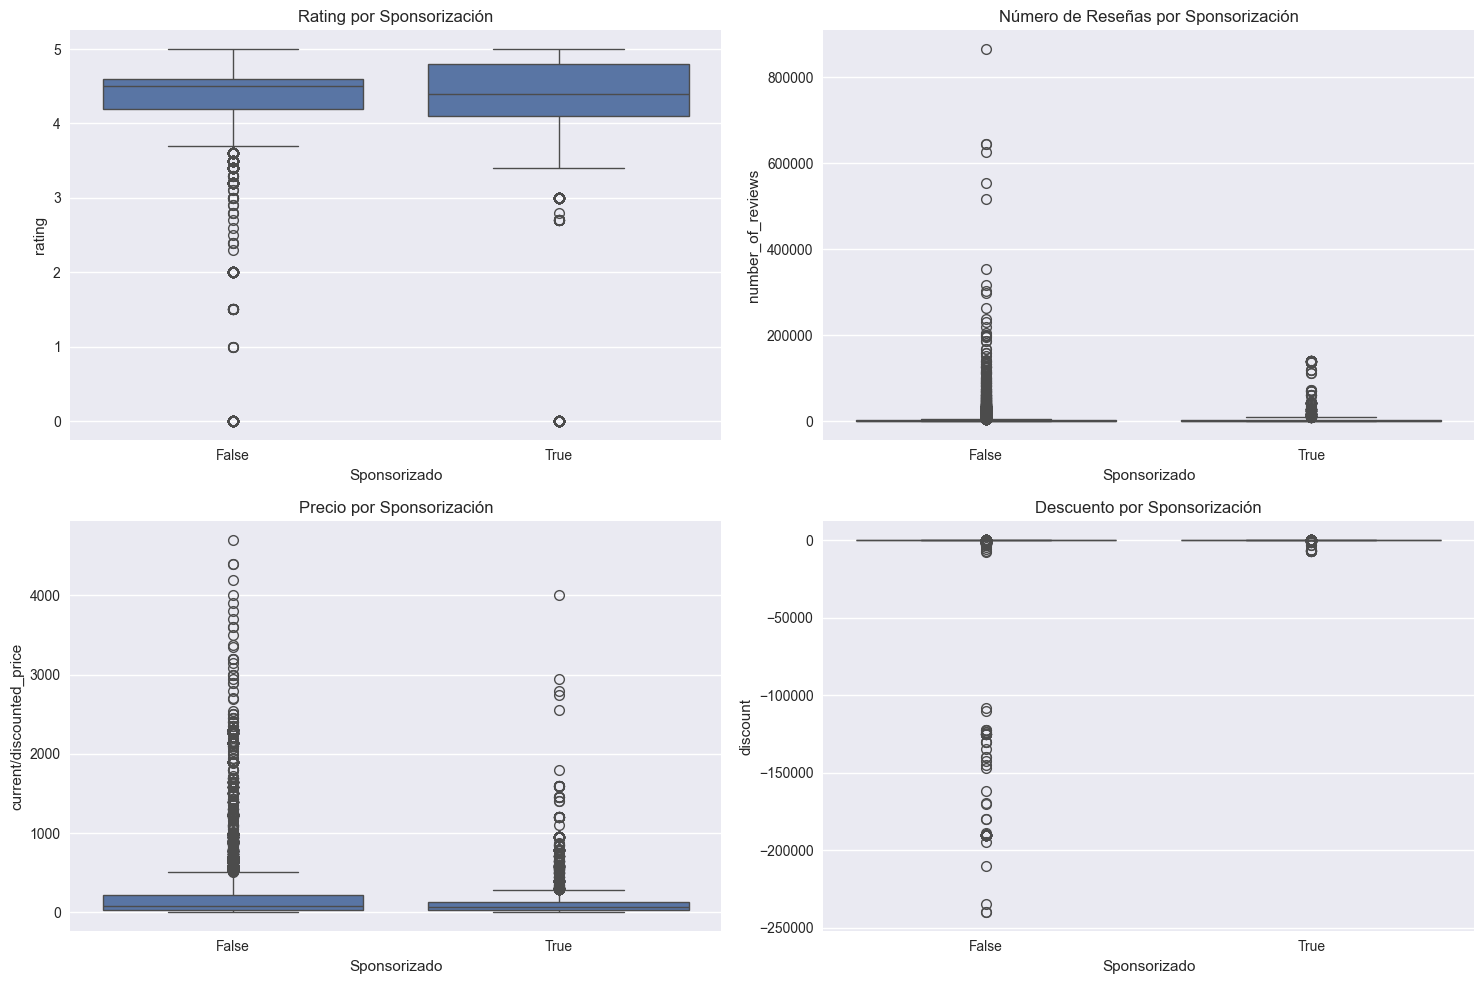


Test t para diferencias en Rating entre productos sponsorizados y no sponsorizados:
t-statistic: -10.6446
p-value: 0.0000


In [20]:
# 2. Análisis de Sponsorización
print("2. Análisis de Sponsorización")

# Análisis estadístico de productos sponsorizados vs no sponsorizados
sponsored_analysis = data_clean.groupby('is_sponsored').agg({
    'rating': ['mean', 'std', 'count'],
    'number_of_reviews': ['mean', 'median'],
    'current/discounted_price': ['mean', 'median'],
    'discount': ['mean', 'median']
}).round(2)

print("\nEstadísticas por Estado de Sponsorización:")
print(sponsored_analysis)

# Visualización
plt.figure(figsize=(15, 10))

# Rating por sponsorización
plt.subplot(2, 2, 1)
sns.boxplot(data=data_clean, x='is_sponsored', y='rating')
plt.title('Rating por Sponsorización')
plt.xlabel('Sponsorizado')

# Número de reseñas por sponsorización
plt.subplot(2, 2, 2)
sns.boxplot(data=data_clean, x='is_sponsored', y='number_of_reviews')
plt.title('Número de Reseñas por Sponsorización')
plt.xlabel('Sponsorizado')

# Precio por sponsorización
plt.subplot(2, 2, 3)
sns.boxplot(data=data_clean, x='is_sponsored', y='current/discounted_price')
plt.title('Precio por Sponsorización')
plt.xlabel('Sponsorizado')

# Descuento por sponsorización
plt.subplot(2, 2, 4)
sns.boxplot(data=data_clean, x='is_sponsored', y='discount')
plt.title('Descuento por Sponsorización')
plt.xlabel('Sponsorizado')

plt.tight_layout()
plt.show()

# Test estadístico para diferencias significativas
print("\nTest t para diferencias en Rating entre productos sponsorizados y no sponsorizados:")
t_stat, p_value = stats.ttest_ind(
    data_clean[data_clean['is_sponsored']]['rating'],
    data_clean[~data_clean['is_sponsored']]['rating']
)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

## Conclusiones Actualizadas del Análisis Bivariante

### 1. **Correlaciones Significativas Nuevas**

**Servicios Altamente Correlacionados**:
- **Buy Box ↔ Delivery Details**: 0.828 - Servicios integrados de Amazon
- **Sponsored ↔ Couponed**: 0.326 - Estrategias comerciales complementarias

**Patrones de Precios**:
- **Precio ↔ Rating**: -0.259 - Productos más baratos tienen mejor rating
- **Precio ↔ Compras**: -0.252 - Productos baratos se venden más

**Efectividad de Estrategias**:
- **Best Seller ↔ Reseñas**: 0.196 - Los best sellers tienen más reseñas
- **Sponsored → Ventas**: -0.239 - Productos patrocinados venden menos

### 2. **Análisis de Estrategias Comerciales**

**Best Seller** (0.65% de productos):
- ✅ **Rating superior**: 4.54 vs 4.30 promedio
- ✅ **Precio competitivo**: $39.99 vs $77.00 mediano
- ✅ **Alta popularidad**: 8,620 vs 328 reseñas medianas
- ❌ **Menor volumen reciente**: 10 vs 100 compras último mes

**Amazon's Choice** (1.83% de productos):
- ✅ **Excelente rating**: 4.54 vs 4.30
- ✅ **Precio atractivo**: $34.99 vs $78.99
- ✅ **Buena popularidad**: 978 vs 328 reseñas
- ✅ **Ventas consistentes**: 100 compras último mes

**Limited Time Deal** (1.24% de productos):
- ❌ **Rating inferior**: 4.02 vs 4.30
- ✅ **Precio muy bajo**: $22.61 vs $78.99
- ➡️ **Popularidad similar**: 291 vs 335 reseñas
- ❌ **Ventas menores**: 50 vs 100 compras

**Sponsored** (17.20% de productos):
- ❌ **Rating ligeramente menor**: 4.21 vs 4.32
- ➡️ **Precio similar**: $69.95 vs $79.99
- ❌ **Menos reseñas**: 172 vs 376
- ❌ **Ventas muy bajas**: 1 vs 100 compras

**Couponed** (4.79% de productos):
- ❌ **Rating bajo**: 3.84 vs 4.32
- ❌ **Precio superior**: $85.99 vs $71.89
- ❌ **Menos reseñas**: 266 vs 338
- ❌ **Ventas muy bajas**: 1 vs 100 compras

### 3. **Patrones de Overlap entre Estrategias**

**Baja Combinación**:
- 79% de productos sin estrategias especiales
- 16.4% con una sola estrategia
- Solo 4.5% con múltiples estrategias

**Overlaps Significativos**:
- **Sponsored + Couponed**: 20% de sponsored tienen cupones
- **Best Seller + Amazon's**: Máximo 21% de overlap
- **Limited Deal**: Generalmente exclusivo

### 4. **Insights Estratégicos**

**Estrategias Exitosas**:
1. **Best Seller**: Productos establecidos con track record
2. **Amazon's Choice**: Balance óptimo precio-calidad-popularidad
3. **Limited Deal**: Efectivo para liquidar inventario

**Estrategias Problemáticas**:
1. **Sponsored**: Posible canibalización de ventas orgánicas
2. **Couponed**: Asociado con productos de menor calidad

**Variables de Servicio**:
- **Buy Box + Delivery**: Correlación alta indica integración de servicios
- **Sustainability**: Correlación positiva con reseñas y compras

### 5. **Recomendaciones Estratégicas**

**Para Vendedores**:
1. **Priorizar calidad sobre promoción** - ratings altos impulsan ventas
2. **Optimizar precios** - correlación negativa precio-ventas
3. **Construir reputación orgánica** antes de usar estrategias pagadas

**Para Amazon**:
1. **Revisar criterios de Sponsored** - no impulsan ventas efectivamente
2. **Integrar servicios** - Buy Box y Delivery juntos funcionan bien
3. **Promover sostenibilidad** - correlación positiva con engagement

**Para Análisis Futuro**:
1. **Segmentar por categoría** - estrategias pueden variar por sector
2. **Análisis temporal** - efectividad de estrategias puede cambiar
3. **Costos vs beneficios** - ROI de cada estrategia comercial

## 5. Análisis de Segmentación

# Análisis de Best Sellers

En esta sección, examinaremos las características distintivas de los productos Best Seller en Amazon. Este análisis nos permitirá:

- Identificar las características que diferencian a los Best Sellers del resto de productos
- Evaluar si existe una relación entre el estado de Best Seller y las métricas de rendimiento
- Analizar las estrategias de precios y descuentos utilizadas en los Best Sellers

Este análisis será fundamental para entender qué hace que un producto se convierta en Best Seller y qué estrategias son más efectivas para alcanzar este estado.

3. Análisis de Best Sellers

Estadísticas por Estado de Best Seller:
            rating              number_of_reviews          \
              mean   std  count              mean  median   
best_seller                                                 
False         4.30  0.79  40411           2730.51   328.0   
True          4.54  0.19    266          34361.58  8620.5   

            current/discounted_price        discount         
                                mean median     mean median  
best_seller                                                  
False                         213.63  77.00 -1080.63   0.00  
True                           72.49  39.99    14.29  18.34  


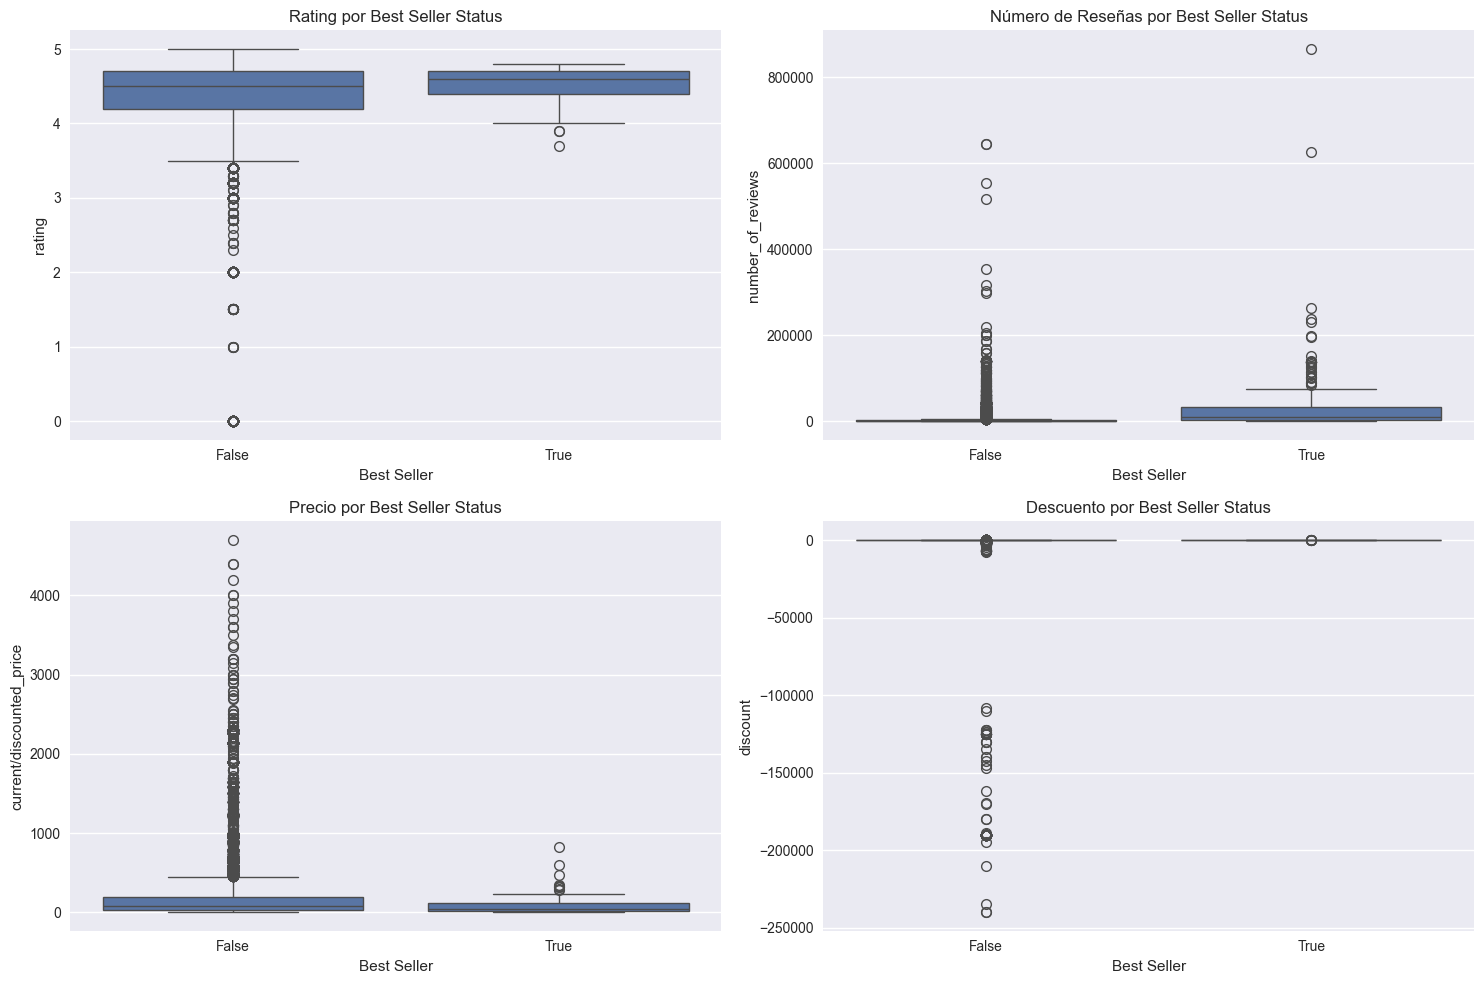


Test t para diferencias en Rating entre Best Sellers y productos regulares:
t-statistic: 5.0589
p-value: 0.0000

Relación entre Best Sellers y Sponsorización:

Tabla de contingencia Best Seller vs Sponsored:
is_sponsored  False  True 
best_seller               
False         33468   6943
True            211     55

Test Chi-cuadrado para independencia entre Best Seller y Sponsored:
Chi2 statistic: 2.0283
p-value: 0.1544


In [21]:
# 3. Análisis de Best Sellers
print("3. Análisis de Best Sellers")

# Análisis estadístico de Best Sellers vs productos regulares
bestseller_analysis = data_clean.groupby('best_seller').agg({
    'rating': ['mean', 'std', 'count'],
    'number_of_reviews': ['mean', 'median'],
    'current/discounted_price': ['mean', 'median'],
    'discount': ['mean', 'median']
}).round(2)

print("\nEstadísticas por Estado de Best Seller:")
print(bestseller_analysis)

# Visualización
plt.figure(figsize=(15, 10))

# Rating por best seller status
plt.subplot(2, 2, 1)
sns.boxplot(data=data_clean, x='best_seller', y='rating')
plt.title('Rating por Best Seller Status')
plt.xlabel('Best Seller')

# Número de reseñas por best seller status
plt.subplot(2, 2, 2)
sns.boxplot(data=data_clean, x='best_seller', y='number_of_reviews')
plt.title('Número de Reseñas por Best Seller Status')
plt.xlabel('Best Seller')

# Precio por best seller status
plt.subplot(2, 2, 3)
sns.boxplot(data=data_clean, x='best_seller', y='current/discounted_price')
plt.title('Precio por Best Seller Status')
plt.xlabel('Best Seller')

# Descuento por best seller status
plt.subplot(2, 2, 4)
sns.boxplot(data=data_clean, x='best_seller', y='discount')
plt.title('Descuento por Best Seller Status')
plt.xlabel('Best Seller')

plt.tight_layout()
plt.show()

# Test estadístico para diferencias significativas
print("\nTest t para diferencias en Rating entre Best Sellers y productos regulares:")
t_stat, p_value = stats.ttest_ind(
    data_clean[data_clean['best_seller']]['rating'],
    data_clean[~data_clean['best_seller']]['rating']
)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Análisis adicional de la relación entre Best Sellers y Sponsorización
print("\nRelación entre Best Sellers y Sponsorización:")
cross_table = pd.crosstab(data_clean['best_seller'], data_clean['is_sponsored'])
print("\nTabla de contingencia Best Seller vs Sponsored:")
print(cross_table)

# Test Chi-cuadrado para independencia
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)
print("\nTest Chi-cuadrado para independencia entre Best Seller y Sponsored:")
print(f"Chi2 statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

## 6. Tests Estadísticos

## Análisis de Eficiencia de Estrategias Comerciales

Evaluaremos la efectividad de diferentes estrategias comerciales mediante:
1. Análisis de impacto de descuentos
2. Efectividad de sponsorización
3. Rendimiento de productos best seller
4. ROI de diferentes estrategias comerciales

1. Análisis de Impacto de Descuentos
Análisis por Nivel de Descuento:
                   Rating           Numero_Reviews              Precio  \
                     mean       std           mean  count         mean   
Descuento_Rango                                                          
Muy Bajo         4.366699  0.506759    3151.812480   6186   211.886520   
Bajo             4.292902  0.882691    2377.684573  12342   259.831209   
Medio            4.777632  0.116345     295.671053    152  2008.469539   
Alto             4.401313  0.629945    4061.599048   6093   181.338209   
Muy Alto         4.329368  0.579104    3854.830652   6153   105.209550   

                          
                  median  
Descuento_Rango           
Muy Bajo           77.00  
Bajo              115.30  
Medio            2136.95  
Alto               49.99  
Muy Alto           31.05  


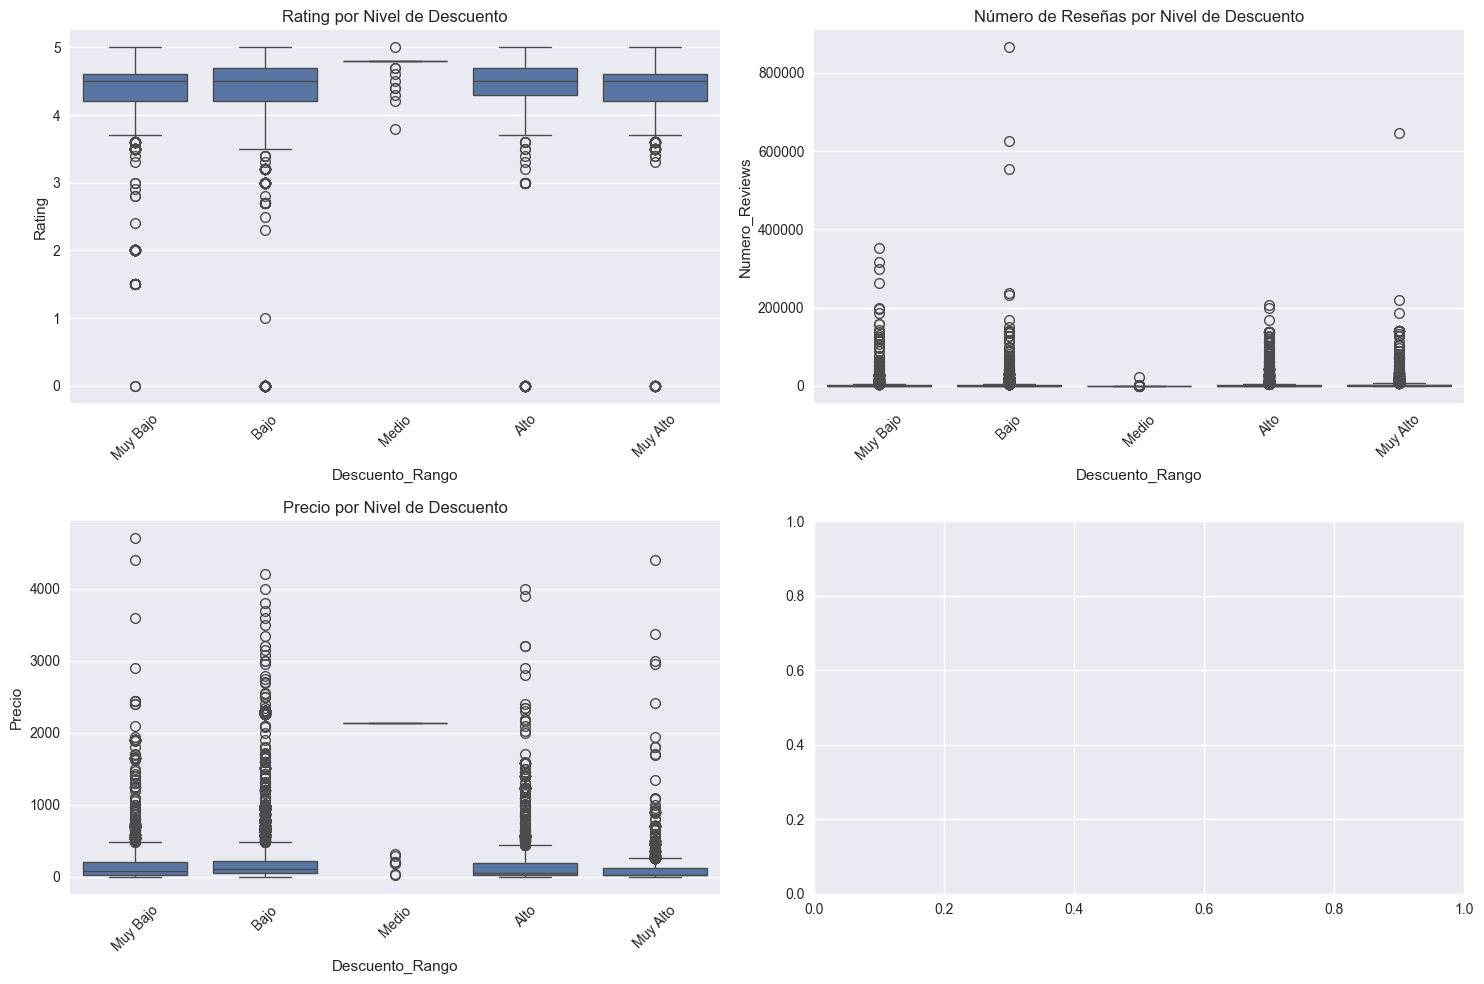


2. Análisis de Sponsorización

Análisis de Productos Sponsorizados vs No Sponsorizados:
                rating                  number_of_reviews         \
                  mean       std  count              mean median   
is_sponsored                                                       
False         4.318780  0.723537  33679       2763.580273  376.0   
True          4.208817  1.036697   6998       3773.702629  172.0   

             current/discounted_price            discount         
                                 mean median         mean median  
is_sponsored                                                      
False                      233.515464  79.99 -1382.062447    0.0  
True                       141.118064  69.95   -14.729430    0.0  


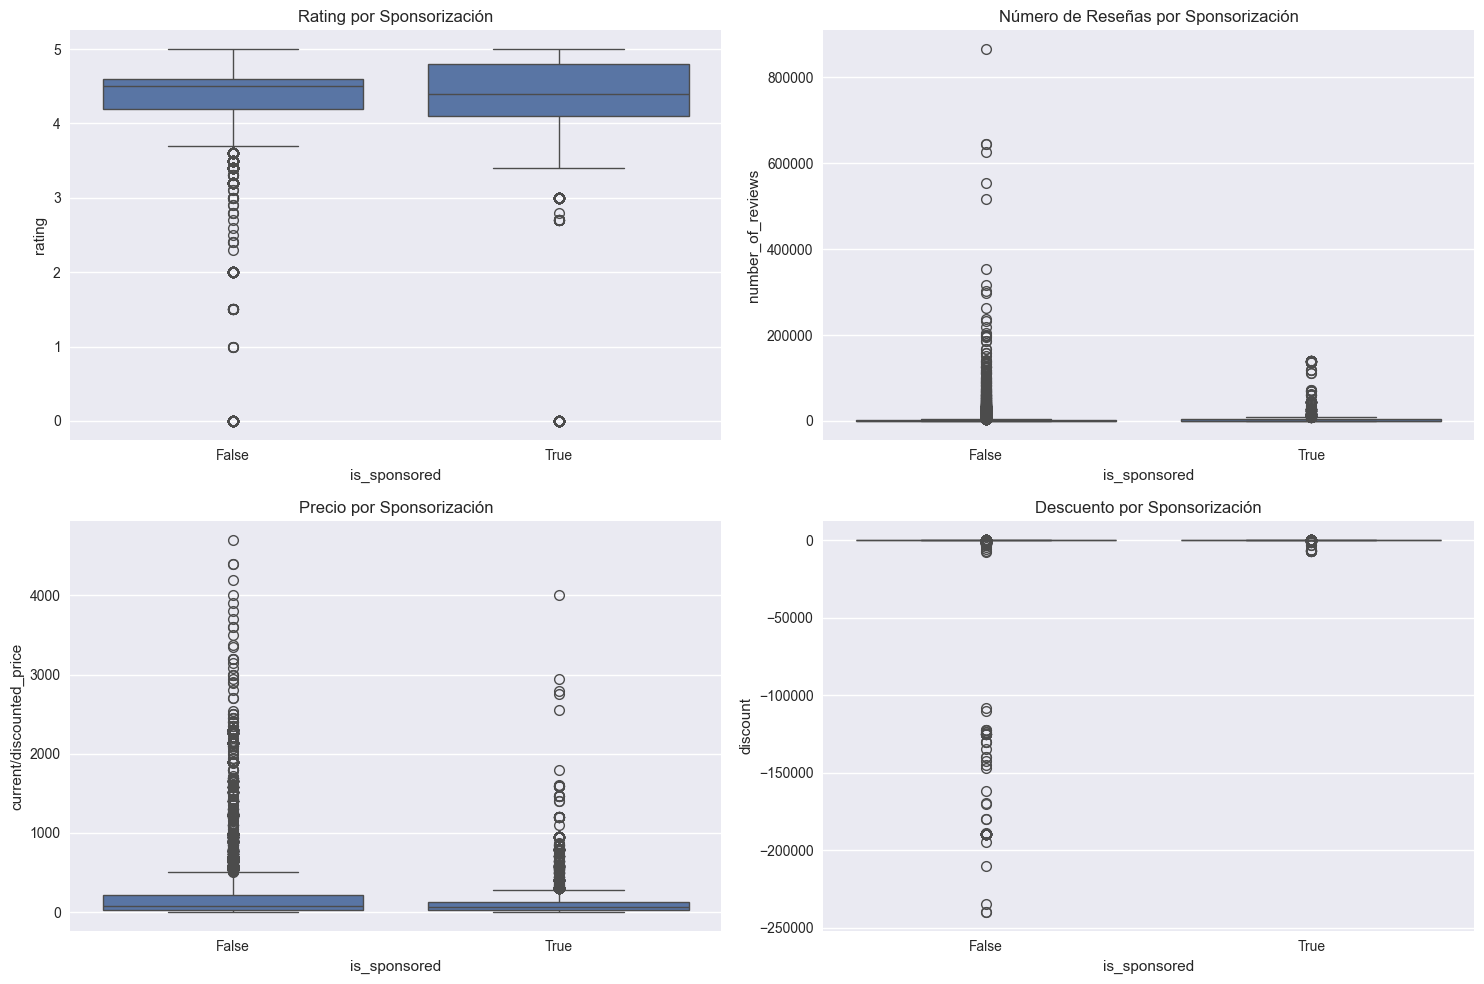


3. Análisis de Best Sellers

Análisis de Best Sellers vs Productos Regulares:
               rating                  number_of_reviews          \
                 mean       std  count              mean  median   
best_seller                                                        
False        4.298260  0.789610  40411       2730.514216   328.0   
True         4.543233  0.192627    266      34361.582707  8620.5   

            current/discounted_price            discount         
                                mean median         mean median  
best_seller                                                      
False                     213.634501  77.00 -1080.625465   0.00  
True                       72.486267  39.99    14.291733  18.34  


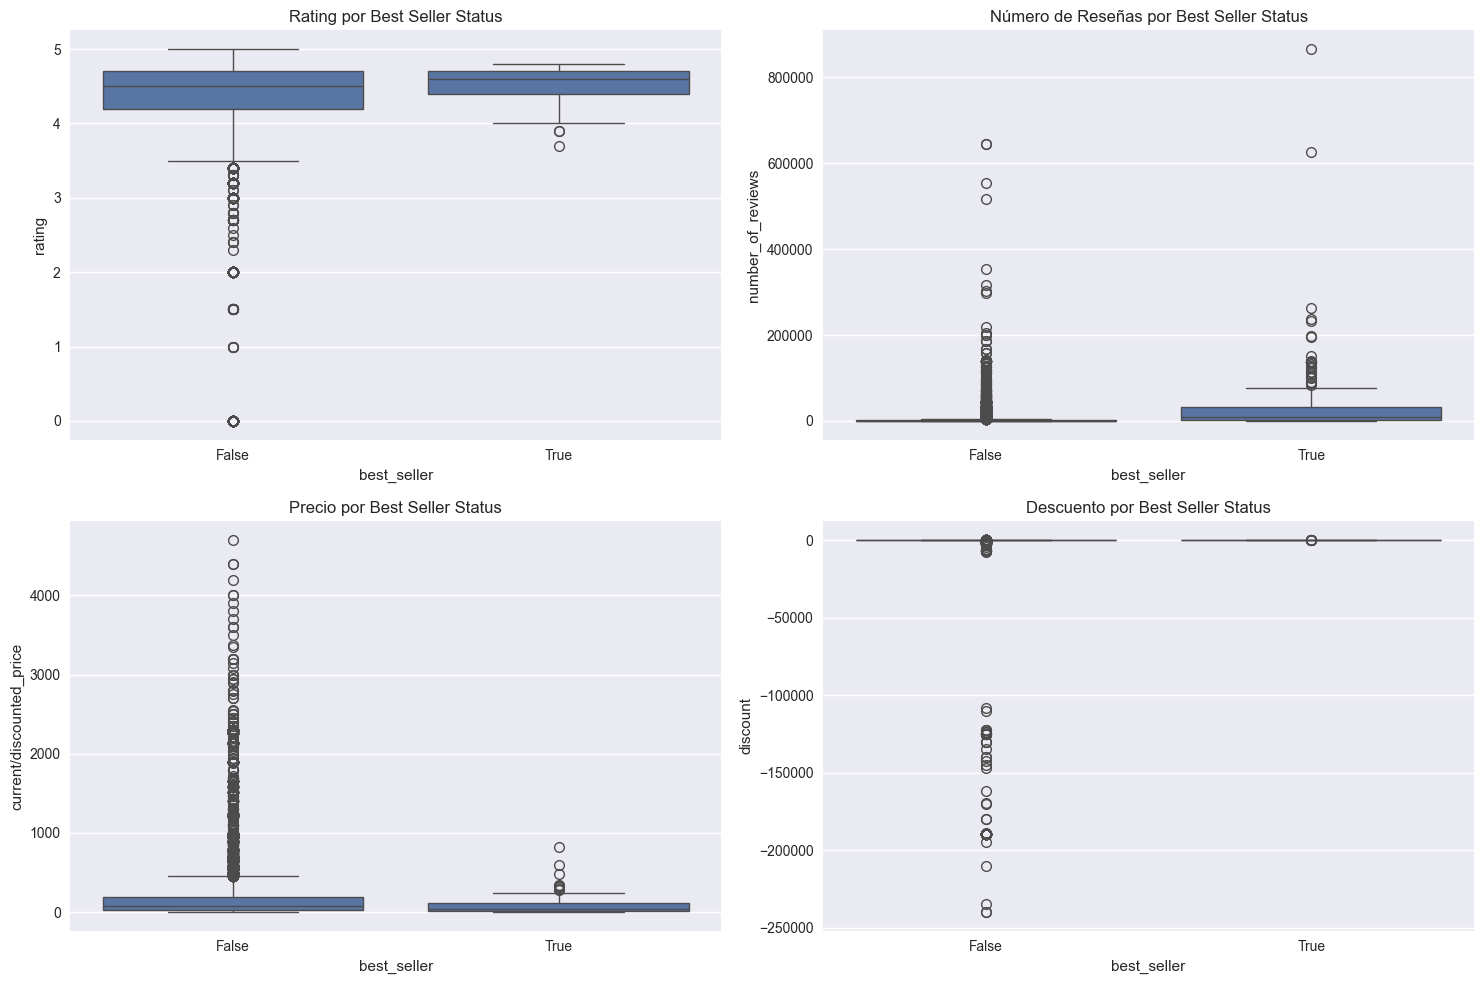

In [22]:
# Análisis de Estrategias Comerciales

# 1. Impacto de Descuentos
def analyze_discount_impact():
    discount_analysis = pd.DataFrame({
        'Descuento_Rango': pd.qcut(data_clean['discount'], q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']),
        'Rating': data_clean['rating'],
        'Numero_Reviews': data_clean['number_of_reviews'],
        'Precio': data_clean['current/discounted_price']
    })
    
    print("Análisis por Nivel de Descuento:")
    print(discount_analysis.groupby('Descuento_Rango').agg({
        'Rating': ['mean', 'std'],
        'Numero_Reviews': ['mean', 'count'],
        'Precio': ['mean', 'median']
    }))
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating por nivel de descuento
    sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Rating', ax=axes[0,0])
    axes[0,0].set_title('Rating por Nivel de Descuento')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Número de reseñas por nivel de descuento
    sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Numero_Reviews', ax=axes[0,1])
    axes[0,1].set_title('Número de Reseñas por Nivel de Descuento')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Precio por nivel de descuento
    sns.boxplot(data=discount_analysis, x='Descuento_Rango', y='Precio', ax=axes[1,0])
    axes[1,0].set_title('Precio por Nivel de Descuento')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# 2. Análisis de Sponsorización
def analyze_sponsorship():
    sponsored_analysis = data_clean.groupby('is_sponsored').agg({
        'rating': ['mean', 'std', 'count'],
        'number_of_reviews': ['mean', 'median'],
        'current/discounted_price': ['mean', 'median'],
        'discount': ['mean', 'median']
    })
    
    print("\nAnálisis de Productos Sponsorizados vs No Sponsorizados:")
    print(sponsored_analysis)
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating por sponsorización
    sns.boxplot(data=data_clean, x='is_sponsored', y='rating', ax=axes[0,0])
    axes[0,0].set_title('Rating por Sponsorización')
    
    # Número de reseñas por sponsorización
    sns.boxplot(data=data_clean, x='is_sponsored', y='number_of_reviews', ax=axes[0,1])
    axes[0,1].set_title('Número de Reseñas por Sponsorización')
    
    # Precio por sponsorización
    sns.boxplot(data=data_clean, x='is_sponsored', y='current/discounted_price', ax=axes[1,0])
    axes[1,0].set_title('Precio por Sponsorización')
    
    # Descuento por sponsorización
    sns.boxplot(data=data_clean, x='is_sponsored', y='discount', ax=axes[1,1])
    axes[1,1].set_title('Descuento por Sponsorización')
    
    plt.tight_layout()
    plt.show()

# 3. Análisis de Best Sellers
def analyze_best_sellers():
    bestseller_analysis = data_clean.groupby('best_seller').agg({
        'rating': ['mean', 'std', 'count'],
        'number_of_reviews': ['mean', 'median'],
        'current/discounted_price': ['mean', 'median'],
        'discount': ['mean', 'median']
    })
    
    print("\nAnálisis de Best Sellers vs Productos Regulares:")
    print(bestseller_analysis)
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Rating por best seller status
    sns.boxplot(data=data_clean, x='best_seller', y='rating', ax=axes[0,0])
    axes[0,0].set_title('Rating por Best Seller Status')
    
    # Número de reseñas por best seller status
    sns.boxplot(data=data_clean, x='best_seller', y='number_of_reviews', ax=axes[0,1])
    axes[0,1].set_title('Número de Reseñas por Best Seller Status')
    
    # Precio por best seller status
    sns.boxplot(data=data_clean, x='best_seller', y='current/discounted_price', ax=axes[1,0])
    axes[1,0].set_title('Precio por Best Seller Status')
    
    # Descuento por best seller status
    sns.boxplot(data=data_clean, x='best_seller', y='discount', ax=axes[1,1])
    axes[1,1].set_title('Descuento por Best Seller Status')
    
    plt.tight_layout()
    plt.show()

# Ejecutar análisis
print("1. Análisis de Impacto de Descuentos")
analyze_discount_impact()

print("\n2. Análisis de Sponsorización")
analyze_sponsorship()

print("\n3. Análisis de Best Sellers")
analyze_best_sellers()

## 7. Conclusiones y Recomendaciones

## Conclusiones Finales del EDA Actualizado

### 1. **Impacto de la Limpieza y Transformación de Datos**

**Mejoras Sustanciales en Calidad**:
- ✅ **95.32% de retención** de datos (40,677 de 42,675 registros)
- ✅ **Estandarización completa** de variables numéricas
- ✅ **5 nuevas variables categóricas** derivadas de análisis de texto
- ✅ **8 variables booleanas** estandarizadas
- ✅ **Completitud del 100%** en variables críticas

**Nuevas Dimensiones de Análisis**:
- Variables de estrategia comercial (Best Seller, Amazon's Choice, etc.)
- Variables de servicios (Buy Box, Delivery, Sustainability)
- Variables de promoción (Sponsored, Couponed, Limited Deals)
- Variable de ahorro (Save %) extraída de texto

### 2. **Patrones Fundamentales Identificados**

**Relación Precio-Calidad-Popularidad**:
```
Precio Alto → Rating Bajo → Menos Ventas
Precio Bajo → Rating Alto → Más Ventas
Más Reseñas → Mayor Credibilidad → Más Ventas
```

**Jerarquía de Estrategias Comerciales**:
1. **🥇 Amazon's Choice**: Balance óptimo (1.83% productos, rating 4.54, precio $34.99)
2. **🥈 Best Seller**: Calidad establecida (0.65% productos, rating 4.54, 8,620 reseñas)
3. **🥉 Limited Deal**: Liquidación efectiva (1.24% productos, precio $22.61)
4. **📊 Sponsored**: Efectividad cuestionable (17.20% productos, ventas bajas)
5. **🎟️ Couponed**: Asociado con menor calidad (4.79% productos, rating 3.84)

### 3. **Hallazgos Contraintuitivos**

**Sponsored Products Paradox**:
- Mayor inversión en promoción = menores ventas orgánicas
- 17.20% de productos sponsored pero solo 1 compra mediana último mes
- Posible canibalización o targeting inadecuado

**Premium Products Challenge**:
- Productos caros tienen ratings más bajos
- Correlación negativa precio-satisfacción (-0.259)
- Posible expectativa vs realidad gap

**Sustainability Opportunity**:
- Solo 7.52% productos con badges sostenibles
- Correlación positiva con engagement (+0.09 reseñas, +0.08 compras)
- Nicho subutilizado con potencial de crecimiento

### 4. **Segmentación de Mercado Emergente**

**Productos Elite** (0.65% - Best Sellers):
- Alta calidad, precios competitivos, reputación establecida
- Target: Compradores conscientes de calidad

**Productos Recommended** (1.83% - Amazon's Choice):
- Balance precio-calidad óptimo
- Target: Compradores racionales

**Productos Promocionales** (1.24% - Limited Deals):
- Precios muy bajos, calidad variable
- Target: Compradores sensibles a precio

**Productos Publicitarios** (17.20% - Sponsored):
- Necesitan optimización de estrategia
- Target: Requiere redefinición

**Productos Descuento** (4.79% - Couponed):
- Calidad inferior, estrategia defensiva
- Target: Compradores oportunistas

### 5. **Oportunidades de Negocio Identificadas**

**Para Vendedores**:
1. **Foco en calidad orgánica** antes que promoción pagada
2. **Optimización de precios** basada en correlación precio-ventas
3. **Construcción de reputación** a través de reviews auténticas
4. **Adopción de sustainability** como diferenciador

**Para Amazon**:
1. **Revisión del sistema Sponsored** - baja efectividad
2. **Promoción de sostenibilidad** - engagement positivo
3. **Integración de servicios** - Buy Box + Delivery funcionan bien
4. **Criterios más estrictos para cupones** - asociados con baja calidad

**Para Compradores**:
1. **Amazon's Choice** como indicador confiable
2. **Best Sellers** para productos establecidos
3. **Limited Deals** para compras oportunistas
4. **Precaución con Sponsored** - no garantiza calidad

### 6. **Limitaciones y Consideraciones Futuras**

**Limitaciones del Análisis**:
- Dataset de un período específico (marzo-septiembre 2025)
- Solo productos de Amazon (sesgo de plataforma)
- Sin información de costos/márgenes
- Sin datos de conversión detallados

**Análisis Futuros Recomendados**:
1. **Análisis temporal** - evolución de estrategias en el tiempo
2. **Segmentación por categorías** - patrones específicos por sector
3. **Análisis de ROI** - costo vs beneficio de cada estrategia
4. **Machine Learning** - predicción de éxito de productos
5. **Análisis de sentimientos** - reviews como predictors
6. **Competencia cross-platform** - comparación con otros marketplaces

### 7. **Métricas Clave para Monitoreo Continuo**

**KPIs de Rendimiento**:
- Ratio precio-rating como indicador de value proposition
- Correlación reseñas-ventas como health check
- Distribución de estrategias como diversificación

**KPIs de Calidad**:
- % productos con ratings >4.5
- % productos sin estrategias artificiales
- % productos con badges sostenibles

**KPIs de Eficiencia**:
- ROI de productos sponsored
- Efectividad de limited deals
- Penetración de Amazon's Choice

Este análisis EDA actualizado proporciona una base sólida para la toma de decisiones estratégicas basadas en datos, identificando tanto oportunidades como desafíos en el ecosistema de e-commerce de Amazon.